In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

%load_ext autoreload
%autoreload 2

%config InlineBackend.figure_format='retina'
import os
import sys
sys.path.insert(0, os.path.abspath('../src/'))

This notebook is a companion to the paper TBC, and reproduces the plots from the paper. We use the Ginibre point process as a running example. It is convenient, since its two-point correlation function and structure factor are analytically known.

In [2]:
import numpy as np
from structure_factor.data import load_data
from structure_factor.structure_factor import StructureFactor
import structure_factor.utils as utils

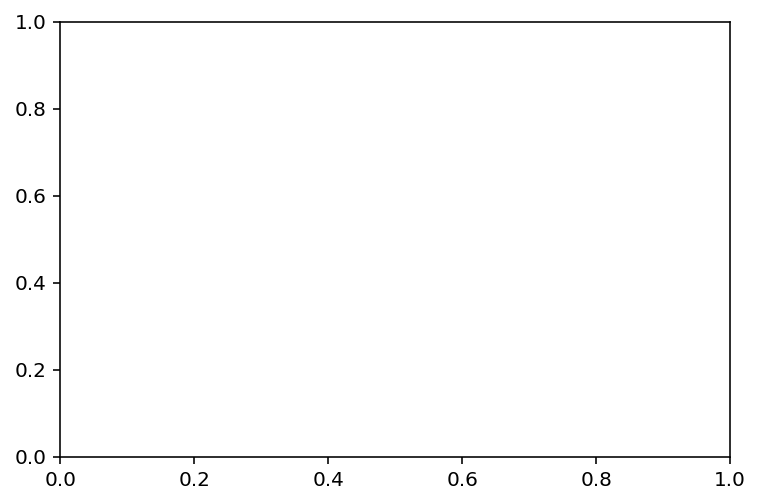

In [3]:
import matplotlib as mpl
import matplotlib.pyplot as plt

# make plots look nice
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
mpl.rcParams['xtick.labelsize'] = 18
mpl.rcParams['ytick.labelsize'] = 18
plt.rc('axes', labelsize=22)
plt.rc('legend', fontsize=14)
mpl.rcParams['ps.useafm'] = True
mpl.rcParams['pdf.use14corefonts'] = True
mpl.rcParams['text.usetex'] = True

# 1- Ginibre Ensemble 

In [ ]:
ginibre_ball_pp = load_data.load_ginibre()

In [ ]:
from structure_factor.spatial_windows import BallWindow
window_show = BallWindow(center=(0,0), radius=50)
ginibre_ball_pp.plot( file_name="ginibre_pp_ball.png")
                # we provide a method to plot the underlying sample

## 1.1- Direct spectral estimators (DSE)

In [ ]:
from structure_factor.spatial_windows import BoxWindow
L = ginibre_ball_pp.window.radius/np.sqrt(2) # sidelength of the cubic window
print("Restricting the window to a cube of length", L)
bounds = np.array([[-L/2, L/2], [-L/2, L/2]]) 
window = BoxWindow(bounds) # create a cubic window
ginibre_pp_box = ginibre_ball_pp.restrict_to_window(window) # create a Ginibre point pattern with box window
sf_ginibre_box = StructureFactor(ginibre_pp_box) # initialize a new instance of StructureFactor
#ginibre_pp_box.plot(file_name="ginibre_sample.png")

### 1.1.1- Scattering intensity

In [ ]:

# on allowed values 
allowed_k, si = sf_ginibre_box.scattering_intensity(k_max=6)
print("Scattering intensity")
fig, axis = plt.subplots(figsize=(7,6))
fig = sf_ginibre_box.plot_tapered_periodogram(allowed_k, si, axes=axis, plot_type="radial",exact_sf=utils.structure_factor_ginibre,
                                            bins=80, error_bar=True, label=r"$\widehat{S}_{\mathrm{SI}}(\frac{2\pi\mathbf{n}}{L})$",
                                           file_name="si_allowed_k.png"
                                          )

Scattering intensity on non allowed values and debiased scattering intensity

In [ ]:
x = np.linspace(-8, 8, 300)
x = x[x != 0]
X, Y = np.meshgrid(x, x)
k = np.column_stack((X.ravel(), Y.ravel()))
# on k 
k, si1 = sf_ginibre_box.scattering_intensity(k=k, debiased=False)
# on k debiased directly
k, si2 = sf_ginibre_box.scattering_intensity(k=k, debiased=True)
# on k debiased undirectly
k, si3 = sf_ginibre_box.scattering_intensity(k=k, debiased=True, direct=False)

In [ ]:
fig, axis = plt.subplots(figsize=(7,6))
fig = sf_ginibre_box.plot_tapered_periodogram(k, si2, axes=axis, positive=False, plot_type="radial",exact_sf=utils.structure_factor_ginibre,
                                            bins=60, error_bar=True, label=r"$\widehat{S}_{\mathrm{DDTP}}(\mathbf{k})$",
                                           file_name="si_k_ddebiased_ginibre.png"
                                          )

 all the above estimators in one picture

In [ ]:
norm_k_allowed = utils.norm_k(allowed_k)
norm_k = utils.norm_k(k)
fig, axis = plt.subplots(figsize=(8, 6))
utils.plot_summary(norm_k_allowed, si, axis=axis, label=r"$\widehat{S}_{\mathrm{SI}}(2 \pi \mathbf{n}/ L)$", fmt='b', bins=60)
utils.plot_summary(norm_k, si1, axis=axis, label=r"$\widehat{S}_{\mathrm{SI}}(\mathbf{k})$", fmt='grey', bins=60 )
utils.plot_summary(norm_k, si2, axis=axis, label=r"$\widehat{S}_{\mathrm{DTP}}(\mathbf{k})$", fmt='k', bins=150 )
utils.plot_summary(norm_k, si3, axis=axis, label=r"$\widehat{S}_{\mathrm{UDTP}}(\mathbf{k})$",fmt='c', bins=180 )
axis.plot(norm_k, utils.structure_factor_ginibre(norm_k), 'g' )

### 1.1.2- Tapered periodogram with sine taper

In [ ]:
from structure_factor.tapers import SineTaper
## tapered periodogram
x = np.linspace(-6, 6, 300)
x = x[x != 0]
X, Y = np.meshgrid(x, x)
k = np.column_stack((X.ravel(), Y.ravel()))
p = [1, 1]
taper = SineTaper(p)
#k, s_tp = sf_ginibre_box.tapered_periodogram(k, taper, debiased=False)
k, s_dtp = sf_ginibre_box.tapered_periodogram(k, taper)
#k, s_udtp = sf_ginibre_box.tapered_periodogram(k, taper, debiased=True, direct=False)

In [ ]:
fig, axis = plt.subplots(figsize=(7,6))
fig = sf_ginibre_box.plot_tapered_periodogram(k, s_dtp, axes=axis, positive=False, plot_type="radial",exact_sf=utils.structure_factor_ginibre,
                                            bins=100, error_bar=True, label=r"$\widehat{S}_{\mathrm{DDTP}}(\mathbf{k})$",
                                           file_name="s_dtp_sine_taper_ginibre.png"
                                          )

In [ ]:
norm_k = utils.norm_k(k)
fig, axis = plt.subplots(figsize=(8, 6))
utils.plot_summary(norm_k, s_tp, axis=axis, label=r"$\widehat{S}_{\mathrm{TP}}(\mathbf{k})$", fmt='b', bins=60 )
utils.plot_summary(norm_k, s_dtp, axis=axis, label=r"$\widehat{S}_{\mathrm{DTP}}(\mathbf{k})$", fmt='k', bins=150 )
utils.plot_summary(norm_k, s_udtp, axis=axis, label=r"$\widehat{S}_{\mathrm{UDTP}}(\mathbf{k})$",fmt='c', bins=180 )
axis.plot(norm_k, utils.structure_factor_ginibre(norm_k), 'g' )

 Result with scattering intensity

In [ ]:
norm_k = utils.norm_k(k)
fig, axis = plt.subplots(figsize=(8, 6))
utils.plot_summary(norm_k, s_dtp, axis=axis, label=r"$\widehat{S}_{\mathrm{DTP}}(\mathbf{k})$", fmt='c', bins=150 )
utils.plot_summary(norm_k_allowed, si, axis=axis, label=r"$\widehat{S}_{\mathrm{SI}}(2 \pi \mathbf{n}/ L)$", fmt='b', bins=60)
utils.plot_summary(norm_k, si2, axis=axis, label=r"$\widehat{S}_{\mathrm{SIDTP}}(\mathbf{k})$", fmt='k', bins=150 )
axis.plot(norm_k, utils.structure_factor_ginibre(norm_k), 'g' )

sine taper looks better than scattering inetsnity

### 1.1.3- Multitapering

In [ ]:
from structure_factor.tapers import SineTaper
## multitapered tapered periodogram
x = np.linspace(-6, 6, 300)
x = x[x != 0]
X, Y = np.meshgrid(x, x)
k = np.column_stack((X.ravel(), Y.ravel()))
#k, s_mtp = sf_ginibre_box.multitapered_periodogram(k, debiased=False)
k, s_mdtp = sf_ginibre_box.multitapered_periodogram(k)
#k, s_mudtp = sf_ginibre_box.multitapered_periodogram(k, debiased=True, direct=False)

In [ ]:
fig, axis = plt.subplots(figsize=(7,6))
fig = sf_ginibre_box.plot_tapered_periodogram(k, s_mdtp, axes=axis, positive=False, plot_type="radial",exact_sf=utils.structure_factor_ginibre,
                                            bins=80, error_bar=True, label=r"$\widehat{S}_{\mathrm{MDDTP}}(\mathbf{k})$",
                                           file_name="s_mdtp_sine_taper_ginibre.png"
                                          )

In [ ]:
norm_k = utils.norm_k(k)
fig, axis = plt.subplots(figsize=(8, 6))
utils.plot_summary(norm_k, s_mtp, axis=axis, label=r"$\widehat{S}_{\mathrm{MTP}}(\mathbf{k})$", fmt='b', ecolor="b", bins=60 )
utils.plot_summary(norm_k, s_mdtp, axis=axis, label=r"$\widehat{S}_{\mathrm{MDTP}}(\mathbf{k})$", fmt='k', ecolor="k", bins=150 )
utils.plot_summary(norm_k, s_mudtp, axis=axis, label=r"$\widehat{S}_{\mathrm{MUDTP}}(\mathbf{k})$",fmt='c', ecolor="c", bins=180 )
axis.plot(norm_k, utils.structure_factor_ginibre(norm_k), 'g' )

compaising with the best of the above

In [ ]:
norm_k = utils.norm_k(k)
norm_k_allowed = utils.norm_k(allowed_k)

fig, axis = plt.subplots(figsize=(10, 8))
utils.plot_summary(norm_k_allowed, si, axis=axis, label=r"$\widehat{S}_{\mathrm{SI}}(2 \pi \mathbf{n}/ L)$", fmt='b', ecolor='b', bins=50)
#utils.plot_summary(norm_k, si2, axis=axis, label=r"$\widehat{S}_{\mathrm{SIDTP}}(\mathbf{k})$", fmt='k', ecolor='k', bins=150 )
utils.plot_summary(norm_k, s_dtp, axis=axis, label=r"$\widehat{S}_{\mathrm{DTP}}(\mathbf{k})$", fmt='k', ecolor='k', bins=50 )
utils.plot_summary(norm_k, s_mdtp, axis=axis, label=r"$\widehat{S}_{\mathrm{MDTP}}(\mathbf{k})$", fmt='m', ecolor="m", bins=50 )
axis.plot(norm_k, utils.structure_factor_ginibre(norm_k), 'g' )

## 1.2- Isotropic estimator (ISD)

In [ ]:
from structure_factor.structure_factor import StructureFactor
sf_ginibre = StructureFactor(ginibre_pp) 
ginibre_pp.plot()

### 1.2.1- Bartlett isotropic estimator

In [ ]:
start_time = time.time()
k_norm, s_bi = sf_ginibre.bartlett_isotropic_estimator(n_allowed_k_norm=60)
print("--- %s seconds ---" % (time.time() - start_time))

In [ ]:
fig, axis = plt.subplots(figsize=(7,6))
sf_ginibre.plot_isotropic_estimator(k_norm, s_bi, #exact_sf=utils.structure_factor_ginibre, axis=axis,
                                    label=r"$\widehat{S}_{\mathrm{BI}}(k)$", 
                                    #file_name="s_bi_ginibre.png"
                                   )

In [ ]:
k_non_allowed = np.linspace(min(k_norm) + 0.002, max(k_norm), 100)
k_norm_non_allowed, s_bi_non_allowed = sf_ginibre.bartlett_isotropic_estimator(k_non_allowed)
fig, axis = plt.subplots(figsize=(7,6))
sf_ginibre.plot_isotropic_estimator(k_norm_non_allowed, s_bi_non_allowed, axis=axis, exact_sf=utils.structure_factor_ginibre,
                                         label=r"$\widehat{S}_{\mathrm{BI}}(k)$", file_name="s_bi_ginibre_non_allowed.png")

### 1.2.2- Hankel transform estimation

#### 1.2.2.1- Pair correlation function

In [ ]:
from structure_factor.pair_correlation_function import PairCorrelationFunction as pcf

pcf.ppp

In [ ]:
r= np.linspace(0, 10, 200)
ginibre_pcf_ppp = pcf.estimate(ginibre_pp, method="ppp", r=r, correction="all")

In [ ]:
pcf.plot(ginibre_pcf_ppp, exact_pcf=utils.pair_correlation_function_ginibre, figsize=(7,6),
         color=['grey', 'b', 'darkcyan'], style=[".", "*", "^"],
         file_name="pcf_ppp_ginibre.png")

pcf.fv

In [ ]:
ginibre_pcf_fv = pcf.estimate(ginibre_pp, method="fv", Kest=dict(rmax=100), fv=dict(method="b", spar=0.05))
ginibre_pcf_fv

In [ ]:
pcf.plot(ginibre_pcf_fv, exact_pcf=utils.pair_correlation_function_ginibre, figsize=(7,6), color=['grey'], style=["."],
         #file_name="pcf_fv_ginibre.png"
        )

Interpolation

In [ ]:
ginibre_pcf_fct = pcf.interpolate(r=ginibre_pcf_fv["r"], pcf_r=ginibre_pcf_fv["pcf"], drop=True)
r_max = np.max(ginibre_pcf_fv["r"])
r_ = np.linspace(0, 10, 200)
plt.plot(r_, ginibre_pcf_fct(r_), 'b')
plt.plot(r_, utils.pair_correlation_function_ginibre(r_), 'g')

Ogata

In [ ]:
k_norm = np.linspace(0.5, 10, 1000) # vector of wave length
k_norm, sf_Ogata = sf_ginibre.hankel_quadrature(ginibre_pcf_fct, method="Ogata", k_norm=k_norm, step_size=0.01,
                                                    nb_points=500)
fig, axis = plt.subplots(figsize=(7,6))
fig = sf_ginibre.plot_isotropic_estimator(k_norm, sf_Ogata, axis=axis,error_bar=True, bins=30, exact_sf=utils.structure_factor_ginibre, label=r"$\widehat{S}_{\mathrm{HO}}(k)$",
                                          file_name="ginibre_s_ho.png"
                                           )

In [ ]:
# from exact pcf
k_norm = np.linspace(0.001, 10, 1000) # vector of wave length
k_norm, sf_Ogata = sf_ginibre.hankel_quadrature(utils.pair_correlation_function_ginibre, method="Ogata", k_norm=k_norm, step_size=0.00001,
                                                    nb_points=500)
fig, axis = plt.subplots(figsize=(7,6))
fig = sf_ginibre.plot_isotropic_estimator(k_norm, sf_Ogata, axis=axis,error_bar=False, bins=30, exact_sf=utils.structure_factor_ginibre, label=r"$\widehat{S}_{\mathrm{HO}}(k)$",
                                          file_name="ginibre_s_ho_exact.png"
                                           )


Baddour-Chouinard

In [ ]:
k = np.linspace(0.5, 5, 400)
k_norm, s_hbc = sf_ginibre.hankel_quadrature(ginibre_pcf_fct,k_norm=k,  r_max=r_max,  nb_points=3000 )

In [ ]:
fig, axis= plt.subplots(figsize=(7,6))
sf_ginibre.plot_isotropic_estimator(k_norm, s_hbc, axis=axis, exact_sf=utils.structure_factor_ginibre, 
                                    #error_bar=True, bins=40,
                                    label=r"$\widehat{S}_{\mathrm{HBC}}(k)$",
                                    #file_name="ginibre_s_hbc.png"
                                   )

In [ ]:
k = np.linspace(0, 10, 400)
k_norm, s_hbc = sf_ginibre.hankel_quadrature(utils.pair_correlation_function_ginibre,k_norm=k,  r_max=r_max,  nb_points=1000 )

In [ ]:
fig, axis= plt.subplots(figsize=(7,6))
sf_ginibre.plot_isotropic_estimator(k_norm, s_hbc, axis=axis, exact_sf=utils.structure_factor_ginibre, error_bar=False, bins=40,
                                    label=r"$\widehat{S}_{\mathrm{HBC}}(k)$",file_name="ginibre_s_hbc_exact.png")

## 1.3- Hyperuniformity

In [ ]:
from structure_factor.hyperuniformity import Hyperuniformity
hyperuniformity_test = Hyperuniformity(k_norm, s_bi)
#bin_center, bin_mean, bin_std = hyperuniformity_test.bin_data(bins=80)

### 1.3.1- Effective hyperuniformity

In [ ]:
H_ginibre, std = hyperuniformity_test.effective_hyperuniformity(k_norm_stop=1)
print("H_ginibre=", H_ginibre)

In [ ]:
import matplotlib.pyplot as plt
#k_norm = hyperuniformity_test.k_norm
#sf = hyperuniformity_test.sf
sf = s_bi
fitted_sf_line = hyperuniformity_test.fitted_line # fitted line to sf
index_peak = hyperuniformity_test.i_first_peak # index of first peak of sf
x = np.linspace(0, 5, 300)
y = np.linspace(0,np.max(k_norm), 500)
fig=plt.figure(figsize=(10,6))
plt.plot(k_norm, sf, 'b.', label="approx_sf")
plt.plot(k_norm, sf, 'b', label="approx_sf")
plt.plot(x, fitted_sf_line(x), 'r--', label= "fitted line")
plt.plot(y, utils.structure_factor_ginibre(y), 'g', label="exact sf")
#plt.plot(mean_k_norm[index_peak], mean_sf[index_peak], 'k*', label="first peak")
plt.legend()
plt.xlabel('wavelength ($||\mathbf{k}||$)')
plt.ylabel('Structure factor ($\mathsf{S}(\mathbf{k})$)')
plt.show()
#fig.savefig("fitted_si_ginibre.pdf", bbox_inches="tight")

### 1.3.2- Hyperuniformity class

In [ ]:
sf_power_decay, c = hyperuniformity_test.hyperuniformity_class(k_norm_stop=0.4)
print(sf_power_decay)

In [ ]:
import matplotlib.pyplot as plt
#k_norm = hyperuniformity_test.k_norm
#sf = hyperuniformity_test.sf
sf = s_bi
fitted_poly = hyperuniformity_test.fitted_poly
x = np.linspace(0, 2, 300)
y = np.linspace(0,np.max(k_norm), 500)
fig=plt.figure(figsize=(10,6))
plt.plot(k_norm, sf, 'b.', label="approx_sf")
plt.plot(k_norm, sf, 'b.', label="approx_sf")

plt.plot(k_norm, sf, 'b', label="approx_sf")
plt.plot(y, utils.structure_factor_ginibre(y), 'g', label="exact sf")
plt.plot(x, fitted_poly(x), 'r--', label= "fitted line")
plt.legend()
plt.xlabel('wavelength ($||\mathbf{k}||$)')
plt.ylabel('Structure factor ($\mathsf{S}(\mathbf{k})$)')
plt.show()
#fig.savefig("fitted_si_ginibre.pdf", bbox_inches="tight")

## 1.4- Statistics

In [31]:
import pickle
from structure_factor.point_pattern import pointpattern_list
from structure_factor.spatial_windows import BallWindow, BoxWindow

Load samples of points

In [32]:
 
# load points
path = "/Users/dhawat/github/structure-factor/src/structure_factor/data/ginibre_sample_list.dat"
with open(path, "rb") as input_file:
    ginibre_data = pickle.load(input_file)

List PointPattern

<AxesSubplot:>

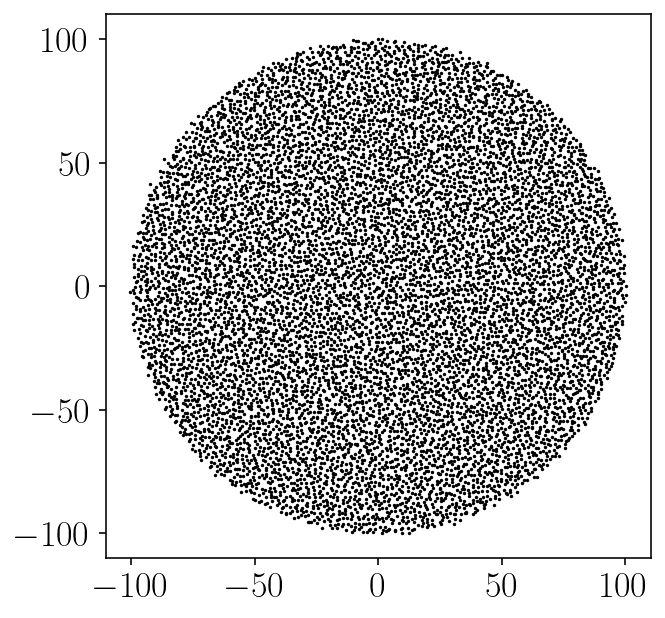

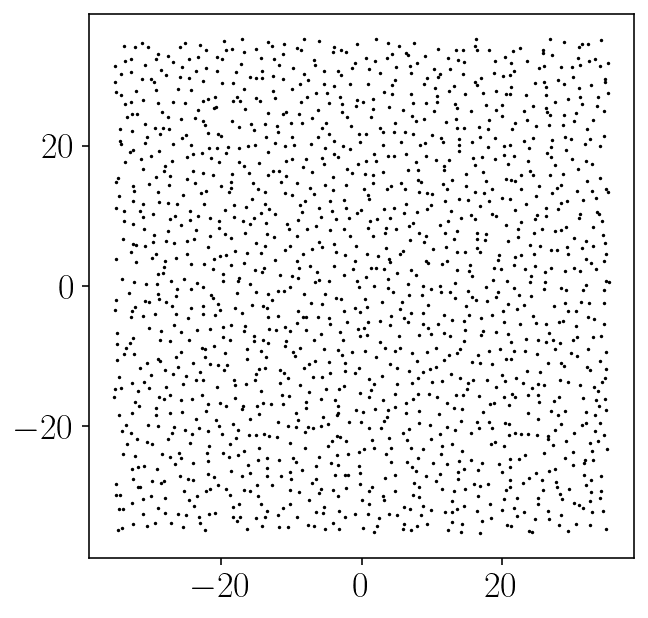

In [33]:
# ginibre pointpattern
# ball window 
window_ball = BallWindow(center=[0, 0], radius=100)
intensity = 1 / np.pi
ginibre_ball_pp_list = pointpattern_list(
    ginibre_data[0], window=window_ball, intensity=intensity
)

ginibre_ball_pp_list[0].plot()

# box window
L = window_ball.radius/np.sqrt(2)
window_box = BoxWindow(bounds=[[-L/2, L/2], [-L/2, L/2]])
size_list = len(ginibre_data[0])
ginibre_box_pp_list = pointpattern_list(
    ginibre_data[0], window=window_ball, intensity=intensity, window_res=window_box
)

ginibre_box_pp_list[2].plot()


Initialize statistics

In [41]:
# statistics
from structure_factor.statistics import SummaryStatistics, get_k, get_k_norm

ginibre_ball_statistics = SummaryStatistics(ginibre_ball_pp_list)
ginibre_box_statistics = SummaryStatistics(ginibre_box_pp_list)

### 1.4.1- For Direct spectral estimators 

In [ ]:
from structure_factor.statistics import apply_estimator
from multiprocessing import Pool
from functools import partial
from structure_factor.tapers import SineTaper
import time

start_time = time.time()
core_num=8

k_allowed = get_k(ginibre_box_pp_list[0], k_max=2)
x = np.linspace(-2, 2, 44)
x = x[x != 0]
X, Y = np.meshgrid(x, x)
k = np.column_stack((X.ravel(), Y.ravel()))
p = [1, 1]
taper = SineTaper(p)

if __name__ == "__main__":
    # scattering intensity
    s_si_allowed_k = ginibre_box_statistics.sample_approximation(estimator="scattering_intensity", k_max=2)
    # scattering intensity debiased
    s_dtp_t0 = ginibre_box_statistics.sample_approximation(estimator="scattering_intensity", k=k, debiased=True, direct=True)
    # debiased tapered periodogram (sinusoidal taper)
    s_dtp_t1 = ginibre_box_statistics.sample_approximation(estimator="tapered_periodogram", k=k,taper=taper, debiased=True, direct=True)
    # multitapered periodogram (sinusoidal taper)
    s_mdtp = ginibre_box_statistics.sample_approximation(estimator="multitapered_periodogram", k=k, debiased=True, direct=True)
    
print("--- %s seconds ---" % (time.time() - start_time))


In [ ]:
m_si, var_si, ivar_si, bias_si, ibias_si, mse_si, imse_si = ginibre_box_statistics.sample_statistics(k=k,
                                                                                approximation=s_si_allowed_k,
                                                                                exact=utils.structure_factor_ginibre )
m_dtp_t0, var_dtp_t0, ivar_dtp_t0, bias_dtp_t0, ibias_dtp_t0, mse_dtp_t0, imse_dtp_t0 = ginibre_box_statistics.sample_statistics(
                                                                                k=k,
                                                                                approximation=s_dtp_t0,
                                                                                exact=utils.structure_factor_ginibre )
m_dtp_t1, var_dtp_t1, ivar_dtp_t1, bias_dtp_t1, ibias_dtp_t1, mse_dtp_t1, imse_dtp_t1 = ginibre_box_statistics.sample_statistics(k=k,
                                                                                approximation=s_dtp_t1,
                                                                                exact=utils.structure_factor_ginibre )
m_mdtp, var_mdtp, ivar_mdtp, bias_mdtp, ibias_mdtp, mse_mdtp, imse_mdtp = ginibre_box_statistics.sample_statistics(k=k,
                                                                                approximation=s_mdtp,
                                                                                exact=utils.structure_factor_ginibre )
print("For s_si: ivar", ivar_si, "ibias", ibias_si, "imse", imse_si)
print("For s_dtp_t0: ivar", ivar_dtp_t0, "ibias", ibias_dtp_t0, "imse", imse_dtp_t0)
print("For s_dtp_t1: ivar", ivar_dtp_t1, "ibias", ibias_dtp_t1, "imse", imse_dtp_t1)
print("For s_mdtp: ivar", ivar_mdtp, "ibias", ibias_mdtp, "imse", imse_mdtp)

In [ ]:
norm_k_allowed1 = utils.norm_k(k_allowed)
fig, axis = plt.subplots(figsize=(7,6))

utils.plot_summary_2(norm_k_allowed1,m_si, c='b',marker='*', bins=30, axis=axis, label=r"$\overline{\widehat{S}_{\mathrm{SI}}(2\pi \mathbf{n}/L)}$")
utils.plot_summary_2(norm_k_allowed1,m_dtp_t0, c='k',marker='.', bins=30, axis=axis, label=r"$\overline{\widehat{S}_{\mathrm{DDTP}}(t_0, \mathbf{k})}$")
utils.plot_summary_2(norm_k_allowed1,m_dtp_t1, c='m',marker='+', bins=30, axis=axis, label=r"$\overline{\widehat{S}_{\mathrm{DDTP}}(t_1, \mathbf{k})}$")
utils.plot_summary_2(norm_k_allowed1,m_mdtp, c='grey',marker='o', bins=30, axis=axis, label=r"$\overline{\widehat{S}_{\mathrm{MDDTP}}((t_j)_{j=1}^4, \mathbf{k})}$")
axis.loglog(norm_k_allowed1, utils.structure_factor_ginibre(norm_k_allowed1), 'g', label=r"$S(\mathbf{k})$")
axis.legend()
axis.set_xlabel(r"Wavenumber ($||\mathbf{k}||$)")
axis.set_ylabel(r"Structure factor ($S(\mathbf{k})$)")
fig.savefig("comparaison_DSE_mean_ginibre.png", bbox_inches="tight")

### 1.4.2- For isotropic estimators

In [49]:
from structure_factor.statistics import apply_estimator
from multiprocessing import Pool
from functools import partial
from structure_factor.statistics import pcf_interpolate_list
import time

start_time = time.time()
core_num=8

n_allowed_k_norm=64
k_norm_allowed = get_k_norm(ginibre_ball_pp_list[0], n_allowed_k_norm=n_allowed_k_norm)

if __name__ == "__main__":
    # Bartlett's isotropic estimator
    #s_bi = ginibre_ball_statistics.sample_approximation(estimator="bartlett_isotropic_estimator", n_allowed_k_norm=n_allowed_k_norm)
    # list pcf
    pcf_list = ginibre_ball_statistics.sample_pcf_approximation(method="fv", Kest=dict(rmax=60, correction="Ripley"), fv=dict(method="b", spar=0.1))
    
print("--- %s seconds ---" % (time.time() - start_time))



Exception ignored from cffi callback <function _processevents at 0x7fd3efc25550>:
Traceback (most recent call last):
  File "/Users/dhawat/github/structure-factor/.venv/lib/python3.9/site-packages/rpy2/rinterface_lib/callbacks.py", line 277, in _processevents
    try:
  File "/Users/dhawat/github/structure-factor/.venv/lib/python3.9/site-packages/rpy2/rinterface.py", line 87, in _sigint_handler
    raise KeyboardInterrupt()
KeyboardInterrupt: 


KeyboardInterrupt: 

<AxesSubplot:xlabel='Radius ($r$)', ylabel='Pair correlation function ($g(r)$)'>

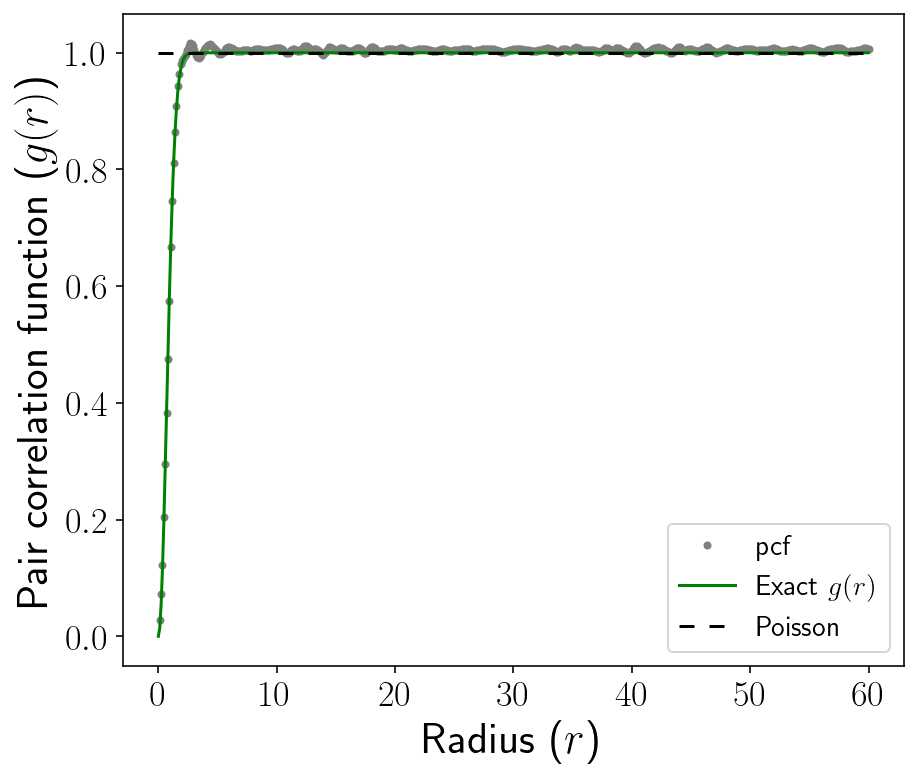

In [48]:
pcf.plot(pcf_list[0], exact_pcf=utils.pair_correlation_function_ginibre, figsize=(7,6),
         color=['grey', 'b', 'darkcyan'], style=[".", "*", "^"],
         file_name="pcf_ppp_ginibre.png")

In [44]:
s = len(pcf_list)
# interpolate pcf
r_list = [pcf_list[i]["r"] for i in range(s)]
pcf_fv_list = [pcf_list[i]["pcf"] for i in range(s)]
pcf_fct_list = pcf_interpolate_list(r_list, pcf_fv_list, drop=True)
# BaddourChouinard
s_hbc_list = ginibre_ball_statistics.sample_integral_approximation(pcf_fct_list,method="BaddourChouinard", 
                                                                   k_norm=k_norm_allowed, r_max=30,  nb_points=1000) 
# Ogata
s_ho_list = ginibre_ball_statistics.sample_integral_approximation(pcf_fct_list,method="Ogata", 
                                                                   k_norm=k_norm_allowed, step_size=0.01,  nb_points=500) 

In [45]:
thomas_box_pp_list[2].window.bounds

NameError: name 'thomas_box_pp_list' is not defined

In [47]:
#m_bi, var_bi, ivar_bi, bias_bi, ibias_bi, mse_bi, imse_bi = ginibre_ball_statistics.sample_statistics(k_norm=k_norm_allowed,
#                                                                                approximation=s_bi,
#                                                                                exact=utils.structure_factor_ginibre )
m_hbc, var_hbc, ivar_hbc, bias_hbc, ibias_hbc, mse_hbc, imse_hbc = ginibre_ball_statistics.sample_statistics(k_norm=k_norm_allowed,
                                                                                approximation=s_hbc_list,
                                                                                exact=utils.structure_factor_ginibre )
m_ho, var_ho, ivar_ho, bias_ho, ibias_ho, mse_ho, imse_ho = ginibre_ball_statistics.sample_statistics(k_norm=k_norm_allowed,
                                                                                approximation=s_ho_list,
                                                                                exact=utils.structure_factor_ginibre )
#print("For s_bi: ivar=", ivar_bi, "ibias=", ibias_bi, "imse=", imse_bi)

print("For s_hbc: ivar=", ivar_hbc, "ibias=", ibias_hbc, "imse=", imse_hbc)

print("For s_ho: ivar=", ivar_ho, "ibias=", ibias_ho, "imse=", imse_ho)

For s_hbc: ivar= 0.007192276166867378 ibias= 0.34782732859368437 imse= 0.35501960476055155
For s_ho: ivar= 5485412095.815626 ibias= 22906415.444795012 imse= 5508318511.260418


In [ ]:
fig, axis = plt.subplots(figsize=(7,6))
axis.loglog(k_norm_allowed, m_bi, 'm*', label=r"$\overline{\widehat{S}_{\mathrm{BI}}(k)}$")
axis.loglog(k_norm_allowed, m_bi, 'm')
axis.loglog(k_norm_allowed, m_ho, 'b.', label=r"$\overline{\widehat{S}_{\mathrm{HO}}(k)}$")
#axis.loglog(k_norm_allowed, m_ho, 'b')
axis.loglog(k_norm_allowed, m_hbc, 'k+', label=r"$\overline{\widehat{S}_{\mathrm{HBC}}(k)}$")
#axis.loglog(k_norm_allowed, m_hbc, 'k')
axis.loglog(k_norm_allowed, utils.structure_factor_ginibre(k_norm_allowed), 'g', label= r"$S(k)$")
axis.legend()
axis.set_xlabel(r"Wavenumber ($k$)")
axis.set_ylabel(r"Structure factor ($S(k)$)")
plt.show()
fig.savefig("comparaison_ISE_mean_ginibre.png", bbox_inches="tight")

# 2- Poisson point process

In this section we repeat the previous experience on a point configuration from a standard homogeneous Poisson Point Process in a cubic window

In [ ]:
from structure_factor.point_process import HomogeneousPoissonPointProcess
poisson = HomogeneousPoissonPointProcess(intensity=1/np.pi)
poisson_points_ball = poisson.generate_sample(window=window_ball, seed=2)
poisson_pp_ball = PointPattern(points=poisson_points_ball, window=window_ball, intensity=1/np.pi)
poisson_points_box = poisson.generate_sample(window=window_box, seed=1)
poisson_pp_box = PointPattern(points=poisson_points_box, window=window_box, intensity=1/np.pi)
poisson_pp_box.plot(file_name="poisson_pp_box.png")
poisson_pp_ball.plot(file_name="poisson_pp_ball.png")

## 2.1- Direct sprectral estimator

In [ ]:
sf_poisson_box = StructureFactor(poisson_pp_box) # initializing the StructureFactor class


### 2.1.2- Scattering intensity

In [ ]:

# on allowed values 
allowed_k, si = sf_poisson_box.scattering_intensity(k_max=6)
print("Scattering intensity")
k_norm = np.linalg.norm(allowed_k, axis=1)
fig, axis = plt.subplots(figsize=(7,6))
fig = sf_poisson_box.plot_tapered_periodogram(allowed_k, si, axes=axis, plot_type="radial",exact_sf=utils.structure_factor_poisson,
                                               label=r"$\widehat{S}_{\mathrm{SI}}(\frac{2\pi\mathbf{n}}{L})$",
                                            bins=40, error_bar=True, file_name="si_allowed_k_pois.png")

In [ ]:
x = np.linspace(-6, 6, 300)
x = x[x != 0]
X, Y = np.meshgrid(x, x)
k = np.column_stack((X.ravel(), Y.ravel()))
# on k 
k, si1 = sf_poisson_box.scattering_intensity(k=k, debiased=False)
# on k debiased directly
k, si2 = sf_poisson_box.scattering_intensity(k=k, debiased=True)
# on k debiased undirectly
k, si3 = sf_poisson_box.scattering_intensity(k=k, debiased=True, direct=False)

In [ ]:
fig, axis = plt.subplots(figsize=(7,6))
fig = sf_poisson_box.plot_tapered_periodogram(k, si1, axes=axis, positive=False, plot_type="radial",exact_sf=utils.structure_factor_poisson,
                                               label=r"$\widehat{S}_{\mathrm{TP}}(\mathbf{k})$",
                                            bins=65, error_bar=True, file_name="si_k_pois.png")

### 2.1.2- Tapered periodogram with SineTaper

In [ ]:
from structure_factor.tapers import SineTaper
## tapered periodogram
x = np.linspace(-6, 6, 300)
x = x[x != 0]
X, Y = np.meshgrid(x, x)
k = np.column_stack((X.ravel(), Y.ravel()))
p = [1, 1]
taper = SineTaper(p)
k, s_tp = sf_poisson_box.tapered_periodogram(k, taper, debiased=False)
k, s_dtp = sf_poisson_box.tapered_periodogram(k, taper)
k, s_udtp = sf_poisson_box.tapered_periodogram(k, taper, debiased=True, direct=False)

In [ ]:
fig, axis = plt.subplots(figsize=(7,6))
fig = sf_poisson_box.plot_tapered_periodogram(k, s_udtp, axes=axis, positive=False, plot_type="radial",
                                            bins=60, error_bar=True, label=r"$\widehat{S}_{\mathrm{UDTP}}(\mathbf{k})$",
                                           file_name="s_udtp_sine_taper_poisson.png"
                                          )

### 2.1.3- Multitapering

In [ ]:
from structure_factor.tapers import SineTaper
## multitapered tapered periodogram
x = np.linspace(-6, 6, 300)
x = x[x != 0]
X, Y = np.meshgrid(x, x)
k = np.column_stack((X.ravel(), Y.ravel()))
k, s_mtp = sf_poisson_box.multitapered_periodogram(k, debiased=False)
k, s_mdtp = sf_poisson_box.multitapered_periodogram(k, P=2)
k, s_mudtp = sf_poisson_box.multitapered_periodogram(k, debiased=True, direct=False, P=2)

In [ ]:
fig, axis = plt.subplots(figsize=(7,6))
fig = sf_poisson_box.plot_tapered_periodogram(k, s_mtp, axes=axis, positive=False, plot_type="radial",
                                            bins=60, error_bar=True, label=r"$\widehat{S}_{\mathrm{MTP}}(\mathbf{k})$",
                                           file_name="s_tp_sine_taper_poisson.png"
                                          )

## 2.2- Isotropic estimators

In [ ]:
from structure_factor.spatial_windows import BallWindow
from structure_factor.point_pattern import PointPattern
from structure_factor.homogeneous_poisson_process import HomogeneousPoissonPointProcess


In [ ]:
sf_poisson_ball = StructureFactor(poisson_pp_ball)

### 2.2.1- Bartlett isotropic estimators

In [ ]:
k_norm, s_bi = sf_poisson_ball.bartlett_isotropic_estimator()
fig, axis = plt.subplots(figsize=(7,6))
sf_poisson_ball.plot_isotropic_estimator(k_norm, s_bi, axis=axis,
                                         label=r"$\widehat{S}_{\mathrm{BI}}(k)$", file_name="s_bi_poisson.png")

In [ ]:
sf_poisson_ball.plot_isotropic_estimator(k_norm, s_bi, axis=axis,
                                         label=r"$\widehat{S}_{\mathrm{BI}}(k)$", file_name="s_bi_poisson.png")

In [ ]:
k_non_allowed = np.linspace(min(k_norm)+0.002, max(k_norm) + 0.002, 100)
k_norm_non_allowed, s_bi_non_allowed = sf_poisson_ball.bartlett_isotropic_estimator(k_non_allowed)
fig, axis = plt.subplots(figsize=(7,6))
sf_poisson_ball.plot_isotropic_estimator(k_norm_non_allowed, s_bi_non_allowed, axis=axis,
                                         label=r"$\widehat{S}_{\mathrm{BI}}(k)$", file_name="s_bi_poisson_non_allowed.png")

In [ ]:
sf_poisson_ball.plot_isotropic_estimator(k_norm_non_allowed, s_bi_non_allowed, axis=axis,
                                         label=r"$\widehat{S}_{\mathrm{BI}}(k)$", file_name="s_bi_poisson_non_allowed.png")
plt.show()

### 2.2.2- Pair correlation function

In [ ]:
from structure_factor.pair_correlation_function import PairCorrelationFunction as pcf

pcf.ppp

In [ ]:
r= np.linspace(0, 10, 200)
poisson_pcf_ppp = pcf.estimate(poisson_pp_ball, method="ppp", r=r, correction="all")
pcf.plot(poisson_pcf_ppp, figsize=(7,6),
         color=['grey', 'b', 'darkcyan'], style=[".", "*", "^"],
         file_name="pcf_ppp_poisson.png")

pcf.fv

In [ ]:
poisson_pcf_fv = pcf.estimate(poisson_pp_ball, method="fv", Kest=dict(rmax=100), fv=dict(method="b", spar=0.1))
pcf.plot(poisson_pcf_fv, figsize=(7,6),
         color=['grey'], style=["."],
         file_name="pcf_fv_poisson.png")

Interpolation

In [ ]:
domain, poisson_pcf_fct = pcf.interpolate(r=poisson_pcf_fv["r"][1:], pcf_r=poisson_pcf_fv["pcf"][1:])

r_max = domain["r_max"] # upper bound of the raduis on which the pcf has been approximated

Ogata

In [ ]:

k_norm = np.linspace(0.4,10, 1000) # vector of wave length
k_norm, sf_Ogata = sf_poisson_ball.hankel_quadrature(poisson_pcf_fct, method="Ogata", k_norm=k_norm, step_size=0.1,
                                                    nb_points=1000)

fig, axis = plt.subplots(figsize=(7,6))
fig = sf_poisson_ball.plot_isotropic_estimator(k_norm, sf_Ogata, axis=axis,
                                               error_bar=True, bins=60,
                                                file_name="poisson_s_ho.png"
                                               )

Baddour-Chouinard

In [ ]:
k = np.linspace(0.2, 10, 200)
k_norm, s_hbc = sf_poisson_ball.hankel_quadrature(poisson_pcf_fct,
                                                  k_norm=k,
                                                   r_max=r_max, 
                                                   nb_points=1000
                                                   )
fig, axis= plt.subplots(figsize=(7,6))
sf_poisson_ball.plot_isotropic_estimator(k_norm, s_hbc, error_bar=True, bins=20, axis=axis, label=r"$\widehat{S}_{\mathrm{HBC}}$", file_name="poisson_s_hbc.png"
                                           )

<AxesSubplot:>

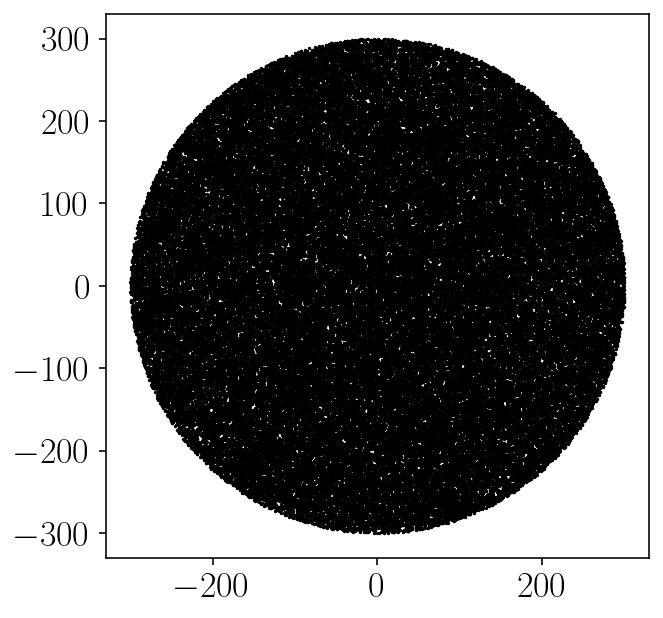

In [13]:
# try to amelioreate ogata
from structure_factor.point_process import HomogeneousPoissonPointProcess
from structure_factor.point_pattern import PointPattern
# Poisson points list
poisson_intensity=1/np.pi
poisson = HomogeneousPoissonPointProcess(intensity=poisson_intensity)

# BallWindow
window_ball = BallWindow(center=[0, 0], radius=300)
poisson_ball_big = poisson.generate_sample(window=window_ball)


# PointPattern
poisson_pp_big = PointPattern(poisson_ball_big, window_ball, poisson_intensity)
poisson_pp_big.plot()

In [14]:
from structure_factor.structure_factor import StructureFactor
sf_poisson_big = StructureFactor(poisson_pp_big)

R[write to console]: number of data points exceeds 3000 - computing border correction estimate only



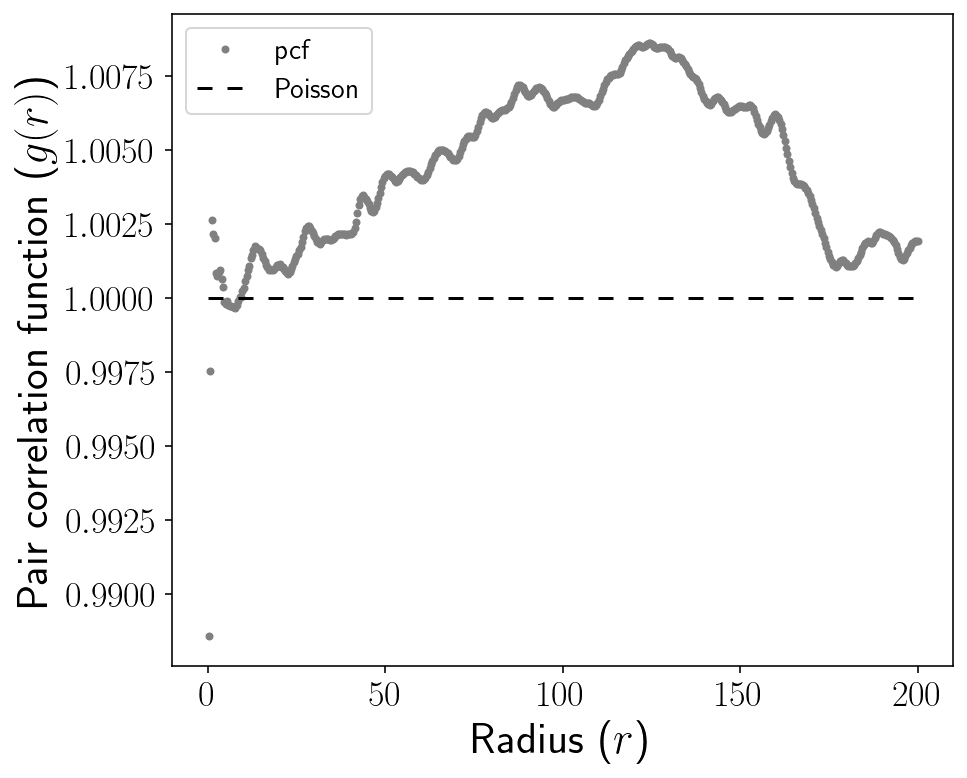

In [23]:
from structure_factor.pair_correlation_function import PairCorrelationFunction as pcf

poisson_pcf_fv = pcf.estimate(poisson_pp_big, method="fv", Kest=dict(rmax=200), fv=dict(method="b", spar=0.3))
pcf.plot(poisson_pcf_fv, figsize=(7,6),
         color=['grey'], style=["."],
         file_name="pcf_fv_poisson.png")

r=poisson_pcf_fv["r"]
pcf_r = poisson_pcf_fv["pcf"]
poisson_pcf_fct = pcf.interpolate(r=r, pcf_r=pcf_r, clean=True, drop=True)
r_max = np.max(r)

In [28]:
from structure_factor.statistics import apply_estimator
from multiprocessing import Pool
from functools import partial
from structure_factor.statistics import pcf_interpolate_list


core_num=8

n_allowed_k_norm=64
k_norm_allowed = get_k_norm(poisson_pp_big, n_allowed_k_norm=n_allowed_k_norm)

In [29]:
k_norm_allowed

array([0.01277235, 0.02338529, 0.03391156, 0.04441231, 0.0549021 ,
       0.0653862 , 0.07586695, 0.08634557, 0.09682276, 0.10729893,
       0.11777436, 0.12824922, 0.13872365, 0.14919773, 0.15967154,
       0.17014512, 0.18061851, 0.19109175, 0.20156486, 0.21203786,
       0.22251076, 0.23298357, 0.24345632, 0.253929  , 0.26440162,
       0.2748742 , 0.28534673, 0.29581922, 0.30629168, 0.31676411,
       0.3272365 , 0.33770887, 0.34818122, 0.35865354, 0.36912585,
       0.37959814, 0.39007041, 0.40054266, 0.4110149 , 0.42148713,
       0.43195934, 0.44243155, 0.45290374, 0.46337592, 0.4738481 ,
       0.48432026, 0.49479242, 0.50526457, 0.51573672, 0.52620885,
       0.53668098, 0.54715311, 0.55762522, 0.56809734, 0.57856945,
       0.58904155, 0.59951365, 0.60998574, 0.62045783, 0.63092992,
       0.641402  , 0.65187408, 0.66234616, 0.67281823])

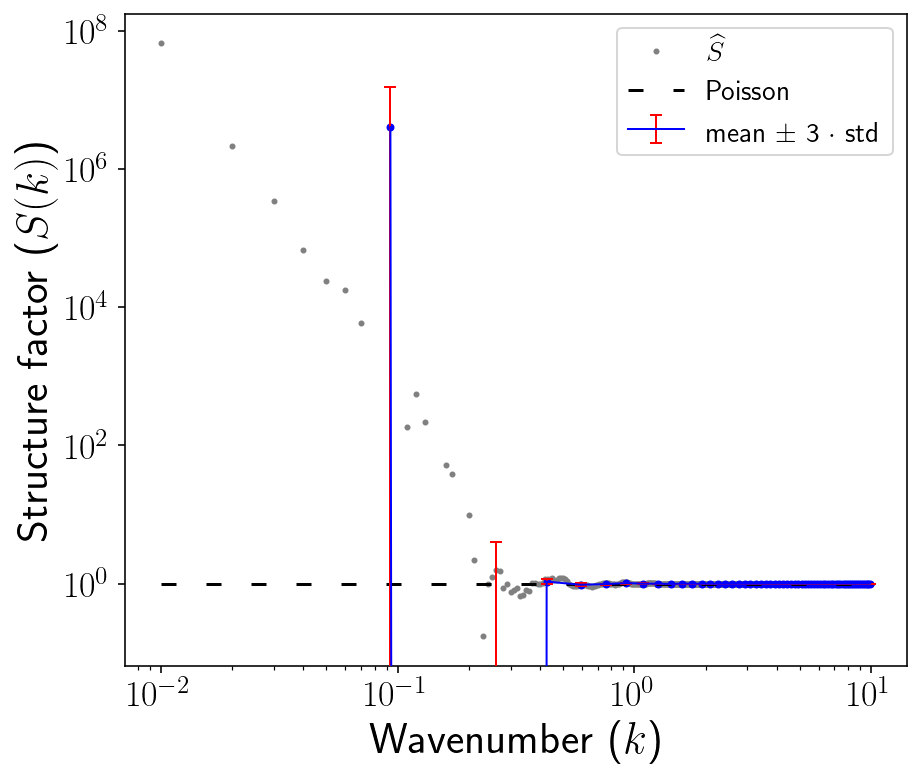

In [30]:

k_norm = np.linspace(0.01,10, 1000) # vector of wave length
k_norm, sf_Ogata = sf_poisson_big.hankel_quadrature(poisson_pcf_fct, method="Ogata", k_norm=k_norm, step_size=0.1,
                                                    nb_points=1000)

fig, axis = plt.subplots(figsize=(7,6))
fig = sf_poisson_big.plot_isotropic_estimator(k_norm, sf_Ogata, axis=axis,
                                               error_bar=True, bins=60,
                                                file_name="poisson_s_ho.png"
                                               )

## 2.3- Hyperuniformity

In [ ]:
from structure_factor.hyperuniformity import Hyperuniformity
hyperuniformity_test = Hyperuniformity(k_norm, s_bi)
bin_center, bin_mean, bin_std = hyperuniformity_test.bin_data(bins=40)

### 2.3.1- Effective hyperuniformity

In [ ]:
H_ginibre, std = hyperuniformity_test.effective_hyperuniformity(k_norm_stop=2)
print("H_ginibre=", H_ginibre)

In [ ]:
#k_norm = hyperuniformity_test.k_norm
#sf = hyperuniformity_test.sf
sf = s_bi
fitted_sf_line = hyperuniformity_test.fitted_line # fitted line to sf
index_peak = hyperuniformity_test.i_first_peak # index of first peak of sf
x = np.linspace(0, 5, 300)
y = np.linspace(0,np.max(k_norm), 500)
fig=plt.figure(figsize=(10,6))
plt.plot(k_norm, sf, 'b.', label="approx_sf")
plt.plot(k_norm, sf, 'b', label="approx_sf")
plt.plot(x, fitted_sf_line(x), 'r--', label= "fitted line")
plt.plot(y, utils.structure_factor_ginibre(y), 'g', label="exact sf")
#plt.plot(mean_k_norm[index_peak], mean_sf[index_peak], 'k*', label="first peak")
plt.legend()
plt.xlabel('wavelength ($||\mathbf{k}||$)')
plt.ylabel('Structure factor ($\mathsf{S}(\mathbf{k})$)')
plt.show()
#fig.savefig("fitted_si_ginibre.pdf", bbox_inches="tight")

### 2.3.2- Hyperuniformity class

In [ ]:
sf_power_decay, c = hyperuniformity_test.hyperuniformity_class(k_norm_stop=0.5)
print(sf_power_decay)


In [ ]:

#k_norm = hyperuniformity_test.k_norm
#sf = hyperuniformity_test.sf
sf = s_bi
fitted_poly = hyperuniformity_test.fitted_poly
x = np.linspace(0, 2, 300)
y = np.linspace(0,np.max(k_norm), 500)
fig=plt.figure(figsize=(10,6))
plt.plot(k_norm, sf, 'b.', label="approx_sf")
plt.plot(k_norm, sf, 'b.', label="approx_sf")

plt.plot(k_norm, sf, 'b', label="approx_sf")
plt.plot(y, utils.structure_factor_ginibre(y), 'g', label="exact sf")
plt.plot(x, fitted_poly(x), 'r--', label= "fitted line")
plt.legend()
plt.xlabel('wavelength ($||\mathbf{k}||$)')
plt.ylabel('Structure factor ($\mathsf{S}(\mathbf{k})$)')
plt.show()
#fig.savefig("fitted_si_ginibre.pdf", bbox_inches="tight")

## 2.4- Statistics

In [6]:
from structure_factor.point_process import HomogeneousPoissonPointProcess
from structure_factor.point_pattern import pointpattern_list
from structure_factor.spatial_windows import BallWindow, BoxWindow


<AxesSubplot:>

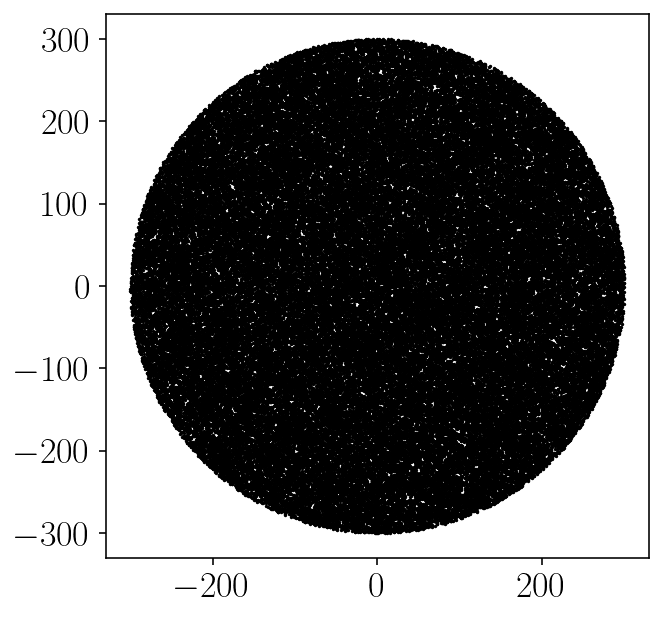

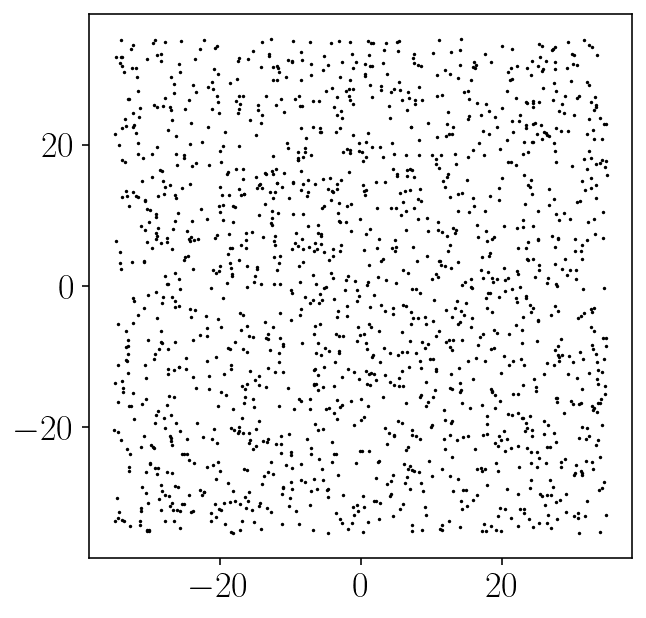

In [8]:
# Poisson points list
poisson_intensity=1/np.pi
poisson = HomogeneousPoissonPointProcess(intensity=poisson_intensity)

s=50

## boxwindow
#L = window_ball.radius/np.sqrt(2)
L=70
window_box = BoxWindow(bounds=[[-L/2, L/2], [-L/2, L/2]])
poisson_box_points_list = poisson.generate_list_of_samples(s=s, window=window_box)
# BallWindow
window_ball = BallWindow(center=[0, 0], radius=300)
poisson_ball_points_list = poisson.generate_list_of_samples(s=s, window=window_ball)

# PointPattern
## BallWindow 
poisson_ball_pp_list = pointpattern_list(
    poisson_ball_points_list, window=window_ball, intensity=poisson_intensity
)

poisson_ball_pp_list[0].plot()

# BoxWindow
poisson_box_pp_list = pointpattern_list(
    poisson_box_points_list, window=window_box, intensity=poisson_intensity
)

poisson_box_pp_list[2].plot()


In [9]:
# statistics
from structure_factor.statistics import SummaryStatistics, get_k, get_k_norm

poisson_ball_statistics = SummaryStatistics(poisson_ball_pp_list)
poisson_box_statistics = SummaryStatistics(poisson_box_pp_list)

### 2.4.2- For DSE

In [ ]:
from structure_factor.statistics import apply_estimator
from multiprocessing import Pool
from functools import partial
from structure_factor.tapers import SineTaper
import time

start_time = time.time()
core_num=8

k_allowed = get_k(poisson_box_pp_list[0], k_max=2)
x = np.linspace(-2, 2, 44)
x = x[x != 0]
X, Y = np.meshgrid(x, x)
k = np.column_stack((X.ravel(), Y.ravel()))
p = [1, 1]
taper = SineTaper(p)

if __name__ == "__main__":
    # scattering intensity
    s_si_allowed_k = poisson_box_statistics.sample_approximation(estimator="scattering_intensity", k_max=2)
    # scattering intensity debiased
    s_dtp_t0 = poisson_box_statistics.sample_approximation(estimator="scattering_intensity", k=k, debiased=True, direct=True)
    # debiased tapered periodogram (sinusoidal taper)
    s_dtp_t1 = poisson_box_statistics.sample_approximation(estimator="tapered_periodogram", k=k,taper=taper, debiased=True, direct=True)
    # multitapered periodogram (sinusoidal taper)
    s_mdtp = poisson_box_statistics.sample_approximation(estimator="multitapered_periodogram", k=k, debiased=True, direct=True)
    
print("--- %s seconds ---" % (time.time() - start_time))


In [ ]:
m_si, var_si, ivar_si, bias_si, ibias_si, mse_si, imse_si = poisson_box_statistics.sample_statistics(k=k,
                                                                                approximation=s_si_allowed_k,
                                                                                exact=utils.structure_factor_poisson )
m_dtp_t0, var_dtp_t0, ivar_dtp_t0, bias_dtp_t0, ibias_dtp_t0, mse_dtp_t0, imse_dtp_t0 = poisson_box_statistics.sample_statistics(
                                                                                k=k,
                                                                                approximation=s_dtp_t0,
                                                                                exact=utils.structure_factor_poisson )
m_dtp_t1, var_dtp_t1, ivar_dtp_t1, bias_dtp_t1, ibias_dtp_t1, mse_dtp_t1, imse_dtp_t1 = poisson_box_statistics.sample_statistics(k=k,
                                                                                approximation=s_dtp_t1,
                                                                                exact=utils.structure_factor_poisson )
m_mdtp, var_mdtp, ivar_mdtp, bias_mdtp, ibias_mdtp, mse_mdtp, imse_mdtp = poisson_box_statistics.sample_statistics(k=k,
                                                                                approximation=s_mdtp,
                                                                                exact=utils.structure_factor_poisson )
print("For s_si: ivar", ivar_si, "ibias", ibias_si, "imse", imse_si)
print("For s_dtp_t0: ivar", ivar_dtp_t0, "ibias", ibias_dtp_t0, "imse", imse_dtp_t0)
print("For s_dtp_t1: ivar", ivar_dtp_t1, "ibias", ibias_dtp_t1, "imse", imse_dtp_t1)
print("For s_mdtp: ivar", ivar_mdtp, "ibias", ibias_mdtp, "imse", imse_mdtp)

In [ ]:
# make plots look nice
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
mpl.rcParams['xtick.labelsize'] = 18
mpl.rcParams['ytick.labelsize'] = 18
plt.rc('axes', labelsize=22)
plt.rc('legend', fontsize=16)
mpl.rcParams['ps.useafm'] = True
mpl.rcParams['pdf.use14corefonts'] = True
mpl.rcParams['text.usetex'] = True

In [ ]:
norm_k_allowed1 = utils.norm_k(k_allowed)
fig, axis = plt.subplots(figsize=(7,6))
utils.plot_summary_2(norm_k_allowed1,m_si, c='b',marker='*', bins=30, axis=axis, label=r"$\overline{\widehat{S}_{\mathrm{SI}}(2\pi \mathbf{n}/L)}$")
utils.plot_summary_2(norm_k_allowed1,m_dtp_t0, c='k',marker='.', bins=30, axis=axis, label=r"$\overline{\widehat{S}_{\mathrm{DDTP}}(t_0, \mathbf{k})}$")
utils.plot_summary_2(norm_k_allowed1,m_dtp_t1, c='m',marker='+', bins=30, axis=axis, label=r"$\overline{\widehat{S}_{\mathrm{DDTP}}(t_1, \mathbf{k})}$")
utils.plot_summary_2(norm_k_allowed1,m_mdtp, c='grey',marker='o', bins=30, axis=axis, label=r"$\overline{\widehat{S}_{\mathrm{MDDTP}}((t_j)_{j=1}^4, \mathbf{k})}$")
axis.loglog(norm_k_allowed1, utils.structure_factor_poisson(norm_k_allowed1), 'g', label=r"$S(\mathbf{k})$")
axis.legend(loc=4)
axis.set_xlabel(r"Wavenumber ($k$)")
axis.set_ylabel(r"Structure factor ($S(k)$)")
fig.savefig("comparaison_DSE_mean_poisson.png", bbox_inches="tight")

### 2.4.2- For ISE

In [ ]:
from structure_factor.statistics import apply_estimator
from multiprocessing import Pool
from functools import partial
from structure_factor.statistics import pcf_interpolate_list

start_time = time.time()
core_num=8

n_allowed_k_norm=64
k_norm_allowed = get_k_norm(poisson_ball_pp_list[0], n_allowed_k_norm=n_allowed_k_norm)

if __name__ == "__main__":
    # Bartlett's isotropic estimator
    s_bi = poisson_ball_statistics.sample_approximation(estimator="bartlett_isotropic_estimator", n_allowed_k_norm=n_allowed_k_norm)
    # list pcf
    pcf_list = poisson_ball_statistics.sample_pcf_approximation(method="fv", Kest=dict(rmax=35), fv=dict(method="b", spar=0.1))
    
print("--- %s seconds ---" % (time.time() - start_time))

In [ ]:
s = len(pcf_list)
# interpolate pcf
r_list = [pcf_list[i]["r"] for i in range(s)]
pcf_fv_list = [pcf_list[i]["pcf"] for i in range(s)]
pcf_fct_list = pcf_interpolate_list(r_list, pcf_fv_list, drop=True)
# BaddourChouinard
s_hbc_list = poisson_ball_statistics.sample_integral_approximation(pcf_fct_list,method="BaddourChouinard", 
                                                                   k_norm=k_norm_allowed, r_max=30,  nb_points=1000) 
# Ogata
s_ho_list = poisson_ball_statistics.sample_integral_approximation(pcf_fct_list,method="Ogata", 
                                                                   k_norm=k_norm_allowed, step_size=0.01,  nb_points=500) 




m_bi, var_bi, ivar_bi, bias_bi, ibias_bi, mse_bi, imse_bi = poisson_ball_statistics.sample_statistics(k_norm=k_norm_allowed,
                                                                                approximation=s_bi,
                                                                                exact=utils.structure_factor_poisson)
m_hbc, var_hbc, ivar_hbc, bias_hbc, ibias_hbc, mse_hbc, imse_hbc =poisson_ball_statistics.sample_statistics(k_norm=k_norm_allowed,
                                                                                approximation=s_hbc_list,
                                                                                exact=utils.structure_factor_poisson )
m_ho, var_ho, ivar_ho, bias_ho, ibias_ho, mse_ho, imse_ho = poisson_ball_statistics.sample_statistics(k_norm=k_norm_allowed,
                                                                                approximation=s_ho_list,
                                                                                exact=utils.structure_factor_poisson )
print("For s_bi: ivar=", ivar_bi, "ibias=", ibias_bi, "imse=", imse_bi)

print("For s_hbc: ivar=", ivar_hbc, "ibias=", ibias_hbc, "imse=", imse_hbc)

print("For s_ho: ivar=", ivar_ho, "ibias=", ibias_ho, "imse=", imse_ho)

In [ ]:
ivar_ho + ibias_ho

In [ ]:
fig, axis = plt.subplots(figsize=(7,6))
axis.loglog(k_norm_allowed, m_bi, 'm*', label=r"$\overline{\widehat{S}_{\mathrm{BI}}(k)}$")
axis.loglog(k_norm_allowed, m_bi, 'm')
axis.loglog(k_norm_allowed, m_ho, 'b.', label=r"$\overline{\widehat{S}_{\mathrm{HO}}(k)}$")
#axis.loglog(k_norm_allowed, m_ho, 'b')
axis.loglog(k_norm_allowed, m_hbc, 'k+', label=r"$\overline{\widehat{S}_{\mathrm{HBC}}(k)}$")
#axis.loglog(k_norm_allowed, m_hbc, 'k')
axis.loglog(k_norm_allowed, utils.structure_factor_poisson(k_norm_allowed), 'g', label= r"$S(k)$")
axis.legend()
axis.set_xlabel(r"Wavenumber ($k$)")
axis.set_ylabel(r"Structure factor ($S(k)$)")
plt.show()
fig.savefig("comparaison_ISE_mean_poisson.png", bbox_inches="tight")

# 3- KLY process

In [ ]:
kly_pp = load_data.load_kly()
L1 = kly_pp.window.bounds[1][1]
kly_pp.points = kly_pp.points - L1/2
kly_pp.window = BoxWindow([[-L1/2, L1/2], [-L1/2, L1/2]])
kly_pp.plot()

## 3.1- Direct spectral estimator

In [ ]:
kly_pp_res = kly_pp.restrict_to_window(window)
kly_pp_res.plot()
sf_kly_res = StructureFactor(kly_pp_res)

### 3.1.1- Scattering intensity

In [ ]:

# on allowed values 
allowed_k, si = sf_kly_res.scattering_intensity(k_max=15)
print("Scattering intensity")



In [ ]:
fig, axis = plt.subplots(figsize=(7,6))
fig = sf_kly_res.plot_tapered_periodogram(allowed_k, si, axes=axis, plot_type="radial",
                                           label=r"$\widehat{S}_{\mathrm{SI}}(\frac{2\pi\mathbf{n}}{L})$",
                                            bins=80, error_bar=True, 
                                           #file_name="si_allowed_k_kly.png"
                                          )

In [ ]:
x = np.linspace(-15, 15, 340)
x = x[x != 0]
X, Y = np.meshgrid(x, x)
k = np.column_stack((X.ravel(), Y.ravel()))
# on k 
#k, si1 = sf_kly_res.scattering_intensity(k=k, debiased=False)
# on k debiased directly
k, si2 = sf_kly_res.scattering_intensity(k=k, debiased=True)
# on k debiased undirectly
#k, si3 = sf_kly_res.scattering_intensity(k=k, debiased=True, direct=False)

In [ ]:
fig, axis = plt.subplots(figsize=(7,6))
fig = sf_kly_res.plot_tapered_periodogram(k, si2, axes=axis, positive=False, plot_type="radial",
                                           label=r"$\widehat{S}_{\mathrm{DDTP}}(\mathbf{k})$",
                                            bins=60, error_bar=True, file_name="s_ddebiased_kly.png")

### 3.1.2- Tapered periodogram with SineTaper

In [ ]:
from structure_factor.tapers import SineTaper
## tapered periodogram
x = np.linspace(-15, 15, 340)
x = x[x != 0]
X, Y = np.meshgrid(x, x)
k = np.column_stack((X.ravel(), Y.ravel()))
p = [1, 1]
taper = SineTaper(p)
#k, s_tp = sf_kly_res.tapered_periodogram(k, taper, debiased=False)
k, s_dtp = sf_kly_res.tapered_periodogram(k, taper)
#s_udtp = sf_kly_res.tapered_periodogram(k, taper, debiased=True, direct=False)

In [ ]:
fig, axis = plt.subplots(figsize=(7,6))
fig = sf_kly_res.plot_tapered_periodogram(k, s_dtp, axes=axis, positive=False, plot_type="radial",
                                            bins=100, error_bar=True, label=r"$\widehat{S}_{\mathrm{DDTP}}(\mathbf{k})$",
                                           file_name="s_dtp_sine_taper_kly.png"
                                          )

### 3.1.3- Multitapering

In [ ]:
from structure_factor.tapers import SineTaper
## multitapered tapered periodogram
x = np.linspace(-15, 15, 300)
x = x[x != 0]
X, Y = np.meshgrid(x, x)
k = np.column_stack((X.ravel(), Y.ravel()))
#k, s_mtp = sf_kly_res.multitapered_periodogram(k, debiased=False)
k, s_mdtp = sf_kly_res.multitapered_periodogram(k)
#k, s_mudtp = sf_kly_res.multitapered_periodogram(k, debiased=True, direct=False)

In [ ]:
fig, axis = plt.subplots(figsize=(7,6))
fig = sf_kly_res.plot_tapered_periodogram(k, s_mdtp, axes=axis, positive=False, plot_type="radial",
                                            bins=80, error_bar=True, label=r"$\widehat{S}_{\mathrm{MDDTP}}(\mathbf{k})$",
                                            file_name="s_mdtp_sine_taper_kly.png"
                                          )

## 3.2- Isotropic estimators

In [ ]:
kly_pp_ball = kly_pp.restrict_to_window(BallWindow(center=(0,0), radius=70))
kly_pp_ball.plot()
window_show = BallWindow(center=(0,0), radius=50)
#kly_pp_ball.plot(window_res=window_show, file_name="kly_ball.png")

In [ ]:
sf_kly_ball = StructureFactor(kly_pp_ball)

### 3.2.1- Bartlett isotropic estimators

In [ ]:
k_norm, s_bi = sf_kly_ball.bartlett_isotropic_estimator(n_allowed_k_norm=200)
fig, axis = plt.subplots(figsize=(7,6))
sf_kly_ball.plot_isotropic_estimator(k_norm, s_bi, axis=axis,
                                         label=r"$\widehat{S}_{\mathrm{BI}}(k)$", file_name="s_bi_kly.png")

In [ ]:
k_non_allowed = np.linspace(min(k_norm)+ 0.003, max(k_norm), 200)
k_norm_non_allowed, s_bi_non_allowed = sf_kly_ball.bartlett_isotropic_estimator(k_non_allowed)
fig, axis = plt.subplots(figsize=(7,6))
sf_kly_ball.plot_isotropic_estimator(k_norm_non_allowed, s_bi_non_allowed, axis=axis,
                                         label=r"$\widehat{S}_{\mathrm{BI}}(k)$", file_name="s_bi_kly_non_allowed.png")

### 3.2.2- Pair correlation function

In [ ]:
from structure_factor.pair_correlation_function import PairCorrelationFunction as pcf


pcf.ppp

In [ ]:

r= np.linspace(0, 10, 200)
kly_pcf_ppp = pcf.estimate(kly_pp_ball, method="ppp", r=r, correction="all")
pcf.plot(kly_pcf_ppp, figsize=(7,6),
         color=['grey', 'b', 'darkcyan'], style=[".", "*", "^"],
         file_name="pcf_ppp_kly.png")

pcf.fv

In [ ]:
kly_pcf_fv = pcf.estimate(kly_pp_ball, method="fv", Kest=dict(rmax=100), fv=dict(method="b", spar=0.1))
pcf.plot(kly_pcf_fv, figsize=(7,6),
         color=['grey'], style=["."],
         file_name="pcf_fv_kly.png")

Interpolation

In [ ]:
domain, kly_pcf_fct = pcf.interpolate(r=kly_pcf_fv["r"][1:], pcf_r=kly_pcf_fv["pcf"][1:])
r_max = domain["r_max"] # upper bound of the raduis on which the pcf has been approximated


### 3.2.3- Hankel transform

Ogata

In [ ]:
k_norm = np.linspace(2, 10, 1000) # vector of wave length
k_norm, sf_Ogata = sf_kly_ball.hankel_quadrature(kly_pcf_fct, method="Ogata", k_norm=k_norm, step_size=0.1,
                                                    nb_points=1000, r_max=r_max)


In [ ]:
fig, axis= plt.subplots(figsize=(7,6))
fig = sf_kly_ball.plot_isotropic_estimator(k_norm, sf_Ogata, axis=axis,  label=r"$\widehat{S}_{\mathrm{HO}}(k)$",
                                            file_name="kly_s_ho.png"
                                           )

Baddour-Chouinard

In [ ]:
k = np.linspace(0.5, 10, 200)
k_norm, s_hbc = sf_kly_ball.hankel_quadrature(kly_pcf_fct, k_norm=k, r_max=r_max, nb_points=1000)

In [ ]:
fig, axis= plt.subplots(figsize=(7,6))
sf_kly_ball.plot_isotropic_estimator(k_norm, s_hbc, axis=axis, error_bar=True, bins=20, label=r"$\widehat{S}_{\mathrm{HBC}}(k)$" , file_name="kly_s_hbc.png")

## 3.3- Hyperuniformity

In [ ]:
from structure_factor.hyperuniformity import Hyperuniformity
hyperuniformity_test = Hyperuniformity(k_norm, s_bi)
#bin_center, bin_mean, bin_std = hyperuniformity_test.bin_data(bins=80)

### 3.3.1- Effective hyperuniformity

In [ ]:
H_poisson, std = hyperuniformity_test.effective_hyperuniformity(k_norm_stop=1)
print("H_poisson=", H_poisson)

In [ ]:
#k_norm = hyperuniformity_test.k_norm
#sf = hyperuniformity_test.sf
sf = s_bi
fitted_sf_line = hyperuniformity_test.fitted_line # fitted line to sf
index_peak = hyperuniformity_test.i_first_peak # index of first peak of sf
x = np.linspace(0, 5, 300)
fig=plt.figure(figsize=(10,6))
plt.plot(k_norm, sf, 'b.', label="approx_sf")
plt.plot(k_norm, sf, 'b', label="approx_sf")
plt.plot(x, fitted_sf_line(x), 'r--', label= "fitted line")
#plt.plot(mean_k_norm[index_peak], mean_sf[index_peak], 'k*', label="first peak")
plt.legend()
plt.xlabel('wavelength ($||\mathbf{k}||$)')
plt.ylabel('Structure factor ($\mathsf{S}(\mathbf{k})$)')
plt.show()
#fig.savefig("fitted_si_ginibre.pdf", bbox_inches="tight")

### 3.3.2- Hyperuniformity class


In [ ]:
sf_power_decay, c = hyperuniformity_test.hyperuniformity_class(k_norm_stop=0.9)
print(sf_power_decay)

In [ ]:
#k_norm = hyperuniformity_test.k_norm
#sf = hyperuniformity_test.sf
sf = s_bi
fitted_poly = hyperuniformity_test.fitted_poly
x = np.linspace(0, 2, 300)
fig=plt.figure(figsize=(10,6))
plt.plot(k_norm[:40], sf[:40], 'b.', label="approx_sf")
#plt.plot(k_norm, sf, 'b', label="approx_sf")
plt.plot(x, fitted_poly(x), 'r--', label= "fitted line")
plt.legend()
plt.xlabel('wavelength ($||\mathbf{k}||$)')
plt.ylabel('Structure factor ($\mathsf{S}(\mathbf{k})$)')
plt.show()
#fig.savefig("fitted_si_ginibre.pdf", bbox_inches="tight")

# 4- Thomas process

In [4]:
from structure_factor.point_process import ThomasProintProcess

In [ ]:
from structure_factor.point_pattern import PointPattern
from structure_factor.spatial_windows import BoxWindow, BallWindow

intensity_parent = 1/(20*np.pi)
mu = 20
sigma=2
thomas = ThomasProintProcess(intensity_parent=intensity_parent, d=2, mu=mu, sigma=sigma)
# big thomas to restrict
window_big = BallWindow(center=[0,0], radius=200)
thomas_big_points = thomas.generate_sample(window=window_big, seed=1)
thomas_big_pp = PointPattern(points=thomas_big_points, window=window_big, intensity=thomas.intensity)
# thomas pp ball
thomas_pp_ball = thomas_big_pp.restrict_to_window(window=window_ball)
thomas_pp_ball.plot(file_name="thomas_pp_ball.png")
# thomas pp box
thomas_pp_box = thomas_big_pp.restrict_to_window(window=window_box)
thomas_pp_box.plot(file_name="thomas_pp_box.png")


## 4.1- Direct spectral estimator

In [ ]:
from structure_factor.structure_factor import StructureFactor
sf_thomas_box = StructureFactor(thomas_pp_box)

### 4.1.1- Scattering intensity

In [ ]:

# on allowed values 
allowed_k, si = sf_thomas_box.scattering_intensity(k_max=6)

In [ ]:
fig, axis = plt.subplots(figsize=(7,6))
fig = sf_thomas_box.plot_tapered_periodogram(allowed_k, si, axes=axis, plot_type="radial",exact_sf=thomas.structure_factor,
                                            bins=80, error_bar=True, 
                                            label=r"$\widehat{S}_{\mathrm{SI}}(\frac{2\pi\mathbf{n}}{L})$",
                                            file_name="si_allowed_k_thomas.png"
                                             )

In [ ]:
x = np.linspace(-6, 6, 300)
x = x[x != 0]
X, Y = np.meshgrid(x, x)
k = np.column_stack((X.ravel(), Y.ravel()))
# on k 
k, si1 = sf_thomas_box.scattering_intensity(k=k, debiased=False)
# on k debiased directly
k, si2 = sf_thomas_box.scattering_intensity(k=k, debiased=True)
# on k debiased undirectly
k, si3 = sf_thomas_box.scattering_intensity(k=k, debiased=True, direct=False)

In [ ]:
fig, axis = plt.subplots(figsize=(7,6))
fig = sf_thomas_box.plot_tapered_periodogram(k, si1, axes=axis, plot_type="radial",exact_sf=thomas.structure_factor,
                                            bins=60, error_bar=True, 
                                            label=r"$\widehat{S}_{\mathrm{SI}}( \mathbf{k})$",
                                            file_name="si_k_thomas.png"
                                             )

### 4.1.2- Tapered periodogram SineTaper

In [ ]:
from structure_factor.tapers import SineTaper
## tapered periodogram
x = np.linspace(-6, 6, 300)
x = x[x != 0]
X, Y = np.meshgrid(x, x)
k = np.column_stack((X.ravel(), Y.ravel()))
p = [1, 1]
taper = SineTaper(p)
_, s_tp = sf_thomas_box.tapered_periodogram(k, taper, debiased=False)
_, s_dtp = sf_thomas_box.tapered_periodogram(k, taper)
_, s_udtp = sf_thomas_box.tapered_periodogram(k, taper, debiased=True, direct=False)

In [ ]:
fig, axis = plt.subplots(figsize=(7,6))
fig = sf_thomas_box.plot_tapered_periodogram(k, s_udtp, axes=axis, positive=False, plot_type="radial", exact_sf=thomas.structure_factor,
                                            bins=80, error_bar=True, label=r"$\widehat{S}_{\mathrm{UDTP}}(\mathbf{k})$",
                                           file_name="s_udtp_sine_taper_thomas.png"
                                          )

### 4.1.3- Multitapering

In [ ]:
from structure_factor.tapers import SineTaper
## multitapered tapered periodogram
x = np.linspace(-6, 6, 300)
x = x[x != 0]
X, Y = np.meshgrid(x, x)
k = np.column_stack((X.ravel(), Y.ravel()))
_, s_mtp = sf_thomas_box.multitapered_periodogram(k, debiased=False)
_,s_mdtp = sf_thomas_box.multitapered_periodogram(k, debiased=True, direct=True) #or simply sf_thomas_res.multitapered_periodogram(k)
_,s_mudtp = sf_thomas_box.multitapered_periodogram(k, debiased=True, direct=False)

In [ ]:
fig, axis = plt.subplots(figsize=(7,6))
fig = sf_thomas_box.plot_tapered_periodogram(k, s_mudtp, axes=axis, positive=False, plot_type="radial",exact_sf=thomas.structure_factor,
                                            bins=80, error_bar=True, label=r"$\widehat{S}_{\mathrm{MUDTP}}( \mathbf{k})$",
                                            file_name="s_mudtp_sine_taper_thomas.png"
                                          )

## 4.2- Isotropic estimators

In [ ]:
sf_thomas_ball = StructureFactor(thomas_pp_ball)

### 4.2.1- Bartlett isotropic estimator

Allowed wavenumbers

In [ ]:
import time
time_start = time.time
k_norm, s_bi = sf_thomas_ball.bartlett_isotropic_estimator(n_allowed_k_norm=150)
print("--- %s seconds ---" % (time.time() - start_time))

In [ ]:
fig, axis = plt.subplots(figsize=(7,6))
sf_th_exact = lambda k: utils.structure_factor_thomas(k, lambdaDaughter, sigma )
sf_thomas_ball.plot_isotropic_estimator(k_norm, s_bi, axis=axis, exact_sf=sf_th_exact,
                                         label=r"$\widehat{S}_{\mathrm{BI}}(k)$", file_name="s_bi_thomas.png")

Non allowed wavenumbers

In [ ]:
k = np.linspace(min(k_norm) + 0.002, max(k_norm), 150)
k_norm_non_allowed, s_bi_nonallowed = sf_thomas_ball.bartlett_isotropic_estimator(k_norm=k)

In [ ]:
fig, axis = plt.subplots(figsize=(7,6))
sf_th_exact = lambda k: utils.structure_factor_thomas(k, lambdaDaughter, sigma )
sf_thomas_ball.plot_isotropic_estimator(k_norm_non_allowed, s_bi_nonallowed, axis=axis, exact_sf=sf_th_exact,
                                         label=r"$\widehat{S}_{\mathrm{BI}}(k)$", file_name="s_bi_thomas_non_allowed_k.png")

### 4.2.2- Pair correlation function

In [ ]:
from structure_factor.pair_correlation_function import PairCorrelationFunction as pcf

In [ ]:
ext_pcf_thomas = lambda r: utils.pair_correlation_function_thomas(r, d=2, rho_parent=lambdaParent, sigma=sigma)

pcf.ppp

In [ ]:
r= np.linspace(0, 10, 200)
thomas_pcf_ppp = pcf.estimate(thomas_pp_ball, method="ppp", r=r, correction="all")
pcf.plot(thomas_pcf_ppp, figsize=(7,6),
         exact_pcf=thomas.pair_correlation_function,
         color=['grey', 'b', 'darkcyan'], style=[".", "*", "^"],
         file_name="pcf_ppp_thomas.png")

pcf.fv

In [ ]:
thomas_pcf_fv = pcf.estimate(thomas_pp_ball, method="fv", Kest=dict(rmax=10), fv=dict(method="b", spar=0.1))


thomas_pcf_fv

In [ ]:
pcf.plot(thomas_pcf_fv, figsize=(7,6),
         exact_pcf=thomas.pair_correlation_function,
         color=['grey'], style=["."],
         file_name="pcf_fv_thomas.png"
        )

Interpolation

In [ ]:

thomas_pcf_fv = pcf.estimate(thomas_pp_ball, method="fv", Kest=dict(rmax=50), fv=dict(method="b", spar=0.1))
pcf.plot(thomas_pcf_fv, figsize=(7,6),
         exact_pcf=thomas.pair_correlation_function,
         color=['grey', 'b', 'darkcyan'], style=[".", "*", "^"])

In [ ]:
thomas_pcf_fv

In [ ]:
thomas_pcf_fct = pcf.interpolate(r=thomas_pcf_fv["r"], pcf_r=thomas_pcf_fv["pcf"], drop=True)
r_max = np.max(thomas_pcf_fv["r"])

In [ ]:
r = np.linspace(0, 20, 200 )
plt.plot(r, thomas_pcf_fct(r), 'b')
plt.plot(r, thomas.pair_correlation_function(r), 'g')

#### 4.2.3- Hankel transform 

Ogata

In [ ]:
k_norm = np.linspace(0.5, 10, 3000) # vector of wave length
k_norm, sf_Ogata = sf_thomas_ball.hankel_quadrature(thomas_pcf_fct, method="Ogata", k_norm=k_norm, step_size=0.01,
                                                    nb_points=500)


In [ ]:
fig, axis =  plt.subplots(figsize=(7,6))
sf_thomas_ball.plot_isotropic_estimator(k_norm, sf_Ogata, axis=axis, exact_sf=thomas.structure_factor, bins=50, error_bar=True, label=r"$\widehat{S}_{\mathrm{HO}}(k)$",
                                            file_name="thomas_s_ho.png"
                                           )

Baddour chouinard

In [ ]:
k = np.linspace(0.5, 10, 400)
k_norm, s_hbc = sf_thomas_ball.hankel_quadrature(thomas_pcf_fct, k_norm=k,  r_max=r_max, nb_points=1000)

In [ ]:
fig, axis= plt.subplots(figsize=(7,6))
sf_thomas_ball.plot_isotropic_estimator(k_norm, s_hbc,axis=axis, exact_sf=thomas.structure_factor, bins=40, error_bar=True, label= r"$\widehat{S}_{\mathrm{HBC}}(k)$",file_name="thomas_s_hbc.png" )

## 4.3- Hyperuniformity

In [ ]:
from structure_factor.hyperuniformity import Hyperuniformity
hyperuniformity_test = Hyperuniformity(k_norm, s_bi)
bin_center, bin_mean, bin_std = hyperuniformity_test.bin_data(bins=50)

In [ ]:
bin_std

### 4.3.1- Effective hyperuniformity

In [ ]:
H_thomas, std = hyperuniformity_test.effective_hyperuniformity(k_norm_stop=0.5)
print("H_thomas=", H_thomas)

In [ ]:
sf_th_exact(0)

In [ ]:
#k_norm = hyperuniformity_test.k_norm
#sf = hyperuniformity_test.sf
sf = s_bi
fitted_sf_line = hyperuniformity_test.fitted_line # fitted line to sf
index_peak = hyperuniformity_test.i_first_peak # index of first peak of sf
x = np.linspace(0, 2, 300)
y = np.linspace(0,np.max(k_norm), 500)
fig=plt.figure(figsize=(10,6))
plt.plot(k_norm, sf, 'b.', label="approx_sf")
plt.plot(k_norm, sf, 'b', label="approx_sf")
plt.plot(x, fitted_sf_line(x), 'r--', label= "fitted line")
plt.plot(y, sf_th_exact(y), 'g', label="exact sf")
#plt.plot(mean_k_norm[index_peak], mean_sf[index_peak], 'k*', label="first peak")
plt.legend()
plt.xlabel('wavelength ($||\mathbf{k}||$)')
plt.ylabel('Structure factor ($\mathsf{S}(\mathbf{k})$)')
plt.show()
#fig.savefig("fitted_si_ginibre.pdf", bbox_inches="tight")

### 4.3.2- Hyperuniformity class 

# NO NEED TO RUN THE TEST AS THE EFFECTIVE TEST SHOW NON HYPERUNIFORMITY

In [ ]:
sf_power_decay, c = hyperuniformity_test.hyperuniformity_class(k_norm_stop=0.5)
print(sf_power_decay)

In [ ]:
#k_norm = hyperuniformity_test.k_norm
#sf = hyperuniformity_test.sf
sf = s_bi
fitted_poly = hyperuniformity_test.fitted_poly
x = np.linspace(0, 2, 300)
y = np.linspace(0,np.max(k_norm), 500)
fig=plt.figure(figsize=(10,6))
plt.plot(k_norm, sf, 'b.', label="approx_sf")
plt.plot(k_norm, sf, 'b.', label="approx_sf")

plt.plot(k_norm, sf, 'b', label="approx_sf")
plt.plot(y, sf_th_exact(y), 'g', label="exact sf")
plt.plot(x, fitted_poly(x), 'r--', label= "fitted line")
plt.legend()
plt.xlabel('wavelength ($||\mathbf{k}||$)')
plt.ylabel('Structure factor ($\mathsf{S}(\mathbf{k})$)')
plt.show()
#fig.savefig("fitted_si_ginibre.pdf", bbox_inches="tight")

## 4.4- Statistics

<AxesSubplot:>

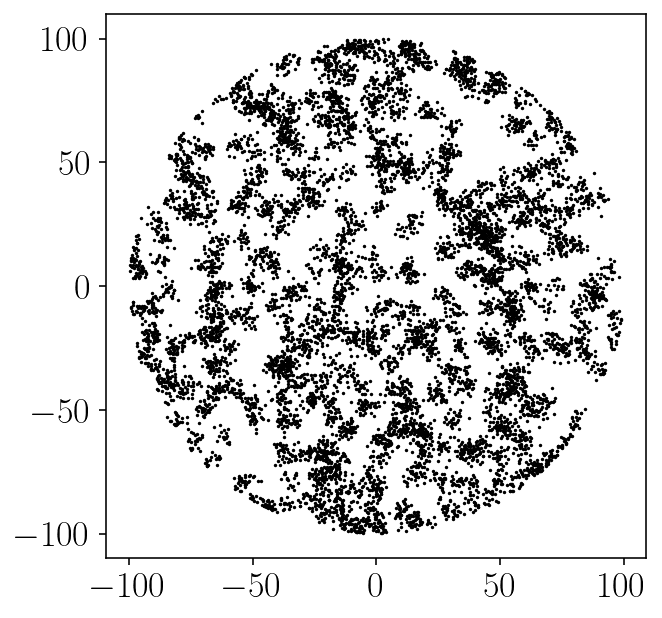

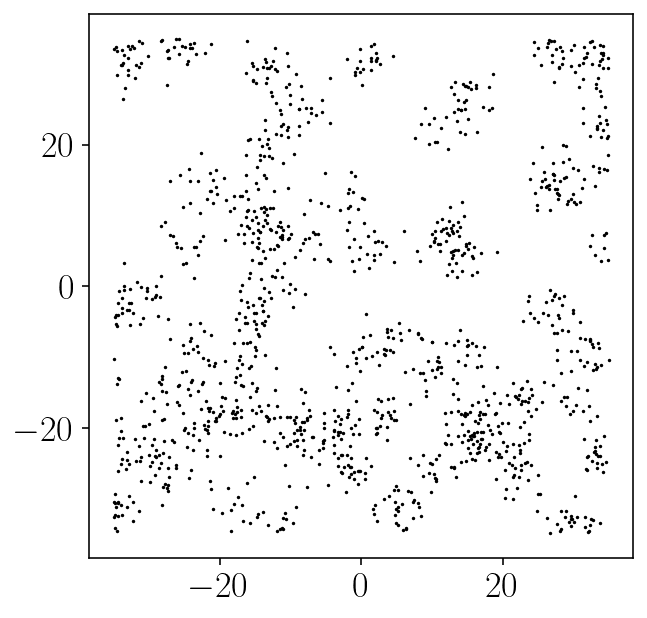

In [5]:
from structure_factor.point_process import ThomasProintProcess
from structure_factor.point_pattern import pointpattern_list
from structure_factor.spatial_windows import BallWindow, BoxWindow

s=50 # number of samples
# Thomas points list
thomas_intensity=1/np.pi
intensity_parent = 1/(20*np.pi)
mu = 20
sigma=2
thomas = ThomasProintProcess(intensity_parent=intensity_parent, d=2, mu=mu, sigma=sigma)
# big thomas to restrict
window_big = BallWindow(center=[0,0], radius=400)
thomas_big_points_list = thomas.generate_list_of_samples(s=s, window=window_big)
#thomas_big_pp_list = PointPattern(points=thomas_big_points, window=window_big, intensity=thomas.intensity)

# thomas pp ball
r_ball = 100
window_ball = BallWindow(center=[0,0], radius=r_ball)
thomas_ball_pp_list = pointpattern_list(list_points=thomas_big_points_list, window=window_big, intensity=thomas_intensity,
                                        window_res=window_ball)
thomas_ball_pp_list[0].plot()

# thomas pp box
l_box = 70
window_box = BoxWindow(bounds=[[-l_box/2, l_box/2], [-l_box/2, l_box/2]])
thomas_box_pp_list = pointpattern_list(list_points=thomas_big_points_list, window=window_big, intensity=thomas_intensity,
                                        window_res=window_box)
thomas_box_pp_list[0].plot()


In [7]:
# initialize statistics
from structure_factor.statistics import SummaryStatistics, get_k, get_k_norm

thomas_ball_statistics = SummaryStatistics(thomas_ball_pp_list)
thomas_box_statistics = SummaryStatistics(thomas_box_pp_list)

### 4.4.1- For DSE

In [12]:
from structure_factor.statistics import apply_estimator
from multiprocessing import Pool
from functools import partial
from structure_factor.tapers import SineTaper
import time

start_time = time.time()
core_num=8

k_allowed = get_k(thomas_box_pp_list[0], k_max=2)
x = np.linspace(-2, 2, 44)
x = x[x != 0]
X, Y = np.meshgrid(x, x)
k = np.column_stack((X.ravel(), Y.ravel()))
p = [1, 1]
taper = SineTaper(p)

if __name__ == "__main__":
    # scattering intensity
    s_si_allowed_k = thomas_box_statistics.sample_approximation(estimator="scattering_intensity", k_max=2)
    # scattering intensity debiased
    s_dtp_t0 = thomas_box_statistics.sample_approximation(estimator="scattering_intensity", k=k, debiased=True, direct=True)
    # debiased tapered periodogram (sinusoidal taper)
    s_dtp_t1 = thomas_box_statistics.sample_approximation(estimator="tapered_periodogram", k=k,taper=taper, debiased=True, direct=True)
    # multitapered periodogram (sinusoidal taper)
    s_mdtp = thomas_box_statistics.sample_approximation(estimator="multitapered_periodogram", k=k, debiased=True, direct=True)
    
print("--- %s seconds ---" % (time.time() - start_time))

/Users/dhawat/github/structure-factor/src/structure_factor/utils.py:260: UserWarning: The computation on all allowed wavevectors may be time-consuming.
  warnings.warn(
/Users/dhawat/github/structure-factor/src/structure_factor/utils.py:260: UserWarning: The computation on all allowed wavevectors may be time-consuming.
  warnings.warn(
/Users/dhawat/github/structure-factor/src/structure_factor/utils.py:260: UserWarning: The computation on all allowed wavevectors may be time-consuming.
  warnings.warn(
/Users/dhawat/github/structure-factor/src/structure_factor/utils.py:260: UserWarning: The computation on all allowed wavevectors may be time-consuming.
  warnings.warn(
/Users/dhawat/github/structure-factor/src/structure_factor/utils.py:260: UserWarning: The computation on all allowed wavevectors may be time-consuming.
  warnings.warn(
/Users/dhawat/github/structure-factor/src/structure_factor/utils.py:260: UserWarning: The computation on all allowed wavevectors may be time-consuming.
  w

--- 26.682027101516724 seconds ---


In [56]:
np.max(utils.norm_k(k))

2.8284271247461903

In [13]:
m_si, var_si, ivar_si, bias_si, ibias_si, mse_si, imse_si = thomas_box_statistics.sample_statistics(k=k,
                                                                                approximation=s_si_allowed_k,
                                                                                exact=thomas.structure_factor )
m_dtp_t0, var_dtp_t0, ivar_dtp_t0, bias_dtp_t0, ibias_dtp_t0, mse_dtp_t0, imse_dtp_t0 = thomas_box_statistics.sample_statistics(
                                                                                k=k,
                                                                                approximation=s_dtp_t0,
                                                                                exact=thomas.structure_factor )
m_dtp_t1, var_dtp_t1, ivar_dtp_t1, bias_dtp_t1, ibias_dtp_t1, mse_dtp_t1, imse_dtp_t1 = thomas_box_statistics.sample_statistics(k=k,
                                                                                approximation=s_dtp_t1,
                                                                                exact=thomas.structure_factor)
m_mdtp, var_mdtp, ivar_mdtp, bias_mdtp, ibias_mdtp, mse_mdtp, imse_mdtp = thomas_box_statistics.sample_statistics(k=k,
                                                                                approximation=s_mdtp,
                                                                                exact=thomas.structure_factor)
print("For s_si: ivar", ivar_si, "ibias", ibias_si, "imse", imse_si)
print("For s_dtp_t0: ivar", ivar_dtp_t0, "ibias", ibias_dtp_t0, "imse", imse_dtp_t0)
print("For s_dtp_t1: ivar", ivar_dtp_t1, "ibias", ibias_dtp_t1, "imse", imse_dtp_t1)
print("For s_mdtp: ivar", ivar_mdtp, "ibias", ibias_mdtp, "imse", imse_mdtp)

For s_si: ivar 9.361320287663991 ibias 0.4051761399558941 imse 9.766496427619874
For s_dtp_t0: ivar 10.832287748468396 ibias 0.2863849423228642 imse 11.118672690791234
For s_dtp_t1: ivar 10.922287052047455 ibias 0.21014787656582148 imse 11.132434928613268
For s_mdtp: ivar 2.846649575862242 ibias 0.06306699743377986 imse 2.909716573296015


Text(0, 0.5, 'Structure factor ($S(k)$)')

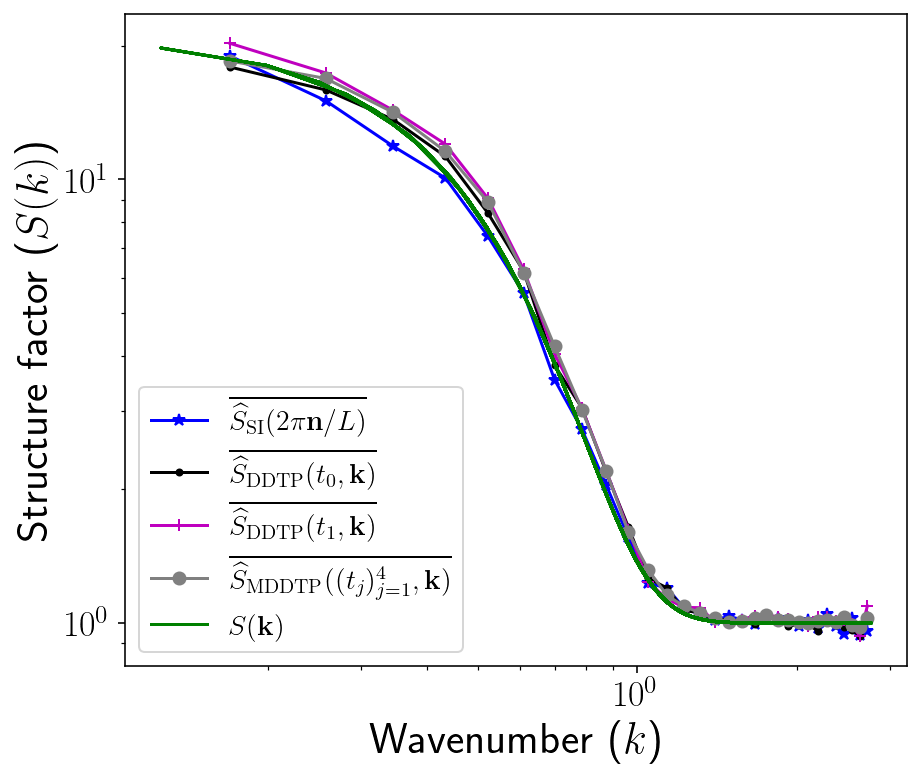

In [58]:
norm_k_allowed1 = utils.norm_k(k_allowed)
fig, axis = plt.subplots(figsize=(7,6))
utils.plot_summary_2(norm_k_allowed1,m_si, c='b',marker='*', bins=30, axis=axis, label=r"$\overline{\widehat{S}_{\mathrm{SI}}(2\pi \mathbf{n}/L)}$")
utils.plot_summary_2(norm_k_allowed1,m_dtp_t0, c='k',marker='.', bins=30, axis=axis, label=r"$\overline{\widehat{S}_{\mathrm{DDTP}}(t_0, \mathbf{k})}$")
utils.plot_summary_2(norm_k_allowed1,m_dtp_t1, c='m',marker='+', bins=30, axis=axis, label=r"$\overline{\widehat{S}_{\mathrm{DDTP}}(t_1, \mathbf{k})}$")
utils.plot_summary_2(norm_k_allowed1,m_mdtp, c='grey',marker='o', bins=30, axis=axis, label=r"$\overline{\widehat{S}_{\mathrm{MDDTP}}((t_j)_{j=1}^4, \mathbf{k})}$")
axis.loglog(norm_k_allowed1, thomas.structure_factor(norm_k_allowed1), 'g', label=r"$S(\mathbf{k})$")
axis.legend(loc=3)
axis.set_xlabel(r"Wavenumber ($k$)")
axis.set_ylabel(r"Structure factor ($S(k)$)")
#fig.savefig("comparaison_DSE_mean_thomas.png", bbox_inches="tight")

### 4.4.2- For ISE

In [14]:
from structure_factor.statistics import apply_estimator
from multiprocessing import Pool
from functools import partial
from structure_factor.statistics import pcf_interpolate_list
import time

start_time = time.time()
core_num=8

n_allowed_k_norm=64
k_norm_allowed = get_k_norm(thomas_ball_pp_list[0], n_allowed_k_norm=n_allowed_k_norm)

if __name__ == "__main__":
    # Bartlett's isotropic estimator
    s_bi = thomas_ball_statistics.sample_approximation(estimator="bartlett_isotropic_estimator", n_allowed_k_norm=n_allowed_k_norm)
    # list pcf
    #pcf_list = thomas_ball_statistics.sample_pcf_approximation(method="fv", Kest=dict(rmax=35), fv=dict(method="b", spar=0.1))
    
print("--- %s seconds ---" % (time.time() - start_time))


/Users/dhawat/github/structure-factor/src/structure_factor/structure_factor.py:275: UserWarning: The computation may take some time for a big number of points in the PointPattern. The complexity is quadratic in the number of points. Start by restricting the PointPattern to a smaller window using  PointPattern.restrict_to_window, then increasing the window progressively.
  warnings.warn(
/Users/dhawat/github/structure-factor/src/structure_factor/structure_factor.py:275: UserWarning: The computation may take some time for a big number of points in the PointPattern. The complexity is quadratic in the number of points. Start by restricting the PointPattern to a smaller window using  PointPattern.restrict_to_window, then increasing the window progressively.
  warnings.warn(
/Users/dhawat/github/structure-factor/src/structure_factor/structure_factor.py:275: UserWarning: The computation may take some time for a big number of points in the PointPattern. The complexity is quadratic in the numbe

--- 1224.5549380779266 seconds ---


In [10]:
s = len(pcf_list)
# interpolate pcf
r_list = [pcf_list[i]["r"] for i in range(s)]
pcf_fv_list = [pcf_list[i]["pcf"] for i in range(s)]
pcf_fct_list = pcf_interpolate_list(r_list, pcf_fv_list, drop=True)
# BaddourChouinard
s_hbc_list = thomas_ball_statistics.sample_integral_approximation(pcf_fct_list,method="BaddourChouinard", 
                                                                   k_norm=k_norm_allowed, r_max=30,  nb_points=1000) 
# Ogata
s_ho_list = thomas_ball_statistics.sample_integral_approximation(pcf_fct_list,method="Ogata", 
                                                                   k_norm=k_norm_allowed, step_size=0.01,  nb_points=500) 


In [15]:
m_bi, var_bi, ivar_bi, bias_bi, ibias_bi, mse_bi, imse_bi = thomas_ball_statistics.sample_statistics(k_norm=k_norm_allowed,
                                                                                approximation=s_bi,
                                                                                exact=thomas.structure_factor )
m_hbc, var_hbc, ivar_hbc, bias_hbc, ibias_hbc, mse_hbc, imse_hbc = thomas_ball_statistics.sample_statistics(k_norm=k_norm_allowed,
                                                                                approximation=s_hbc_list,
                                                                                exact=thomas.structure_factor)
m_ho, var_ho, ivar_ho, bias_ho, ibias_ho, mse_ho, imse_ho = thomas_ball_statistics.sample_statistics(k_norm=k_norm_allowed,
                                                                                approximation=s_ho_list,
                                                                                exact=thomas.structure_factor)
print("For s_bi: ivar=", ivar_bi, "ibias=", ibias_bi, "imse=", imse_bi)

print("For s_hbc: ivar=", ivar_hbc, "ibias=", ibias_hbc, "imse=", imse_hbc)

print("For s_ho: ivar=", ivar_ho, "ibias=", ibias_ho, "imse=", imse_ho)


For s_bi: ivar= 5.6163697515137585 ibias= 0.09970698283174453 imse= 5.716076734345499
For s_hbc: ivar= 25.265173721749594 ibias= 0.7497123817823366 imse= 26.014886103531907
For s_ho: ivar= 1360493121595.5386 ibias= 3088404378.684795 imse= 1363581525974.223


In [ ]:
fig, axis = plt.subplots(figsize=(7,6))
axis.loglog(k_norm_allowed, m_bi, 'm*', label=r"$\overline{\widehat{S}_{\mathrm{BI}}(k)}$")
axis.loglog(k_norm_allowed, m_bi, 'm')
axis.loglog(k_norm_allowed, m_ho, 'b.', label=r"$\overline{\widehat{S}_{\mathrm{HO}}(k)}$")
#axis.loglog(k_norm_allowed, m_ho, 'b')
axis.loglog(k_norm_allowed, m_hbc, 'k+', label=r"$\overline{\widehat{S}_{\mathrm{HBC}}(k)}$")
#axis.loglog(k_norm_allowed, m_hbc, 'k')
axis.loglog(k_norm_allowed, thomas.structure_factor(k_norm_allowed), 'g', label= r"$S(k)$")
axis.legend()
axis.set_xlabel(r"Wavenumber ($k$)")
axis.set_ylabel(r"Structure factor ($S(k)$)")
plt.show()
fig.savefig("comparaison_ISE_mean_thomas.png", bbox_inches="tight")

In [ ]:
fig, axis = plt.subplots(figsize=(7,6))
axis.loglog(k_norm_allowed, m_bi, 'm*', label=r"$\overline{\widehat{S}_{\mathrm{BI}}(k)}$")
axis.loglog(k_norm_allowed, m_bi, 'm')
axis.loglog(k_norm_allowed, m_ho, 'b.', label=r"$\overline{\widehat{S}_{\mathrm{HO}}(k)}$")
#axis.loglog(k_norm_allowed, m_ho, 'b')
axis.loglog(k_norm_allowed, m_hbc, 'k+', label=r"$\overline{\widehat{S}_{\mathrm{HBC}}(k)}$")
#axis.loglog(k_norm_allowed, m_hbc, 'k')
axis.loglog(k_norm_allowed, thomas.structure_factor(k_norm_allowed), 'g', label= r"$S(k)$")
axis.legend()
axis.set_xlabel(r"Wavenumber ($k$)")
axis.set_ylabel(r"Structure factor ($S(k)$)")
plt.show()
fig.savefig("comparaison_ISE_mean_thomas.png", bbox_inches="tight")

## Sine taper

In [ ]:
from structure_factor.tapers import SineTaper

In [ ]:
widths = np.diff(window_.bounds.T, axis=0)
widths.shape

In [ ]:
x = np.linspace(-10, 10, 100)
x = np.array([x]).T
p = 6
sin_t = SineTaper(p)
window_ = BoxWindow([-5, 5])
tp_x = sin_t.taper(x, window_)

In [ ]:
plt.plot(x, tp_x, 'b.')

In [ ]:
x.shape

# Section 2

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import structure_factor.utils as utils

In [ ]:
r = np.linspace(0, 10, 100)
rho_parent = 1/(10*np.pi);  # density of parent Poisson point process
rho_child = 10*np.pi;  # mean number of points in each cluster
sigma = 2
fig, ax = plt.subplots(figsize=(7, 6))
ax.plot(r, utils.pair_correlation_function_ginibre(r), 'b*', label="Ginibre")
ax.plot(r, utils.pair_correlation_function_thomas(x=r, d=2, rho_parent=rho_parent, sigma=sigma), 'k.', label="Thomas")
ax.plot(r, utils.structure_factor_poisson(r), 'g-', label="Poisson")
ax.legend()
fig.savefig("pcf.pdf", bbox_inches="tight")
plt.show

In [ ]:
r = np.linspace(0, 2, 100)
rho_parent = 1/(10*np.pi);  # density of parent Poisson point process
rho_child = 10*np.pi;  # mean number of points in each cluster
sigma = 2
fig, ax = plt.subplots(figsize=(7, 6))
ax.plot(r, utils.structure_factor_ginibre(r), 'b*', label="Ginibre")
ax.plot(r, utils.structure_factor_thomas(k=r, rho_child=rho_child, sigma=sigma), 'k.', label="Thomas")
ax.plot(r, utils.structure_factor_poisson(r), 'g-', label="Poisson")
ax.legend()
fig.savefig("sf.pdf", bbox_inches="tight")
plt.show